In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
cf.go_offline()
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 25)



In [268]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [269]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [270]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [271]:
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [272]:
train[train['BsmtFinSF1'] == 0][['BsmtFinSF1','BsmtFinSF2']]

,BsmtFinSF1,BsmtFinSF2
8,0,0
13,0,0
15,0,0
17,0,0
20,0,0
...,...,...
1448,0,0
1450,0,0
1451,0,0
1453,0,0


# Data Description #

**

In [273]:
for i in [train,test]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [274]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145
...,...,...,...,...
1455,0,0,953,953
1456,790,163,589,1542
1457,275,0,877,1152
1458,49,1029,0,1078


In [275]:
len(train.columns)

81

In [276]:
len(test.columns)

80

In [277]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [278]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [279]:
train['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [280]:
test['MoSold'].value_counts()

6     250
7     212
5     190
4     138
3     126
8     111
9      95
10     84
2      81
1      64
11     63
12     45
Name: MoSold, dtype: int64

# Data Visualization Pt. 1#

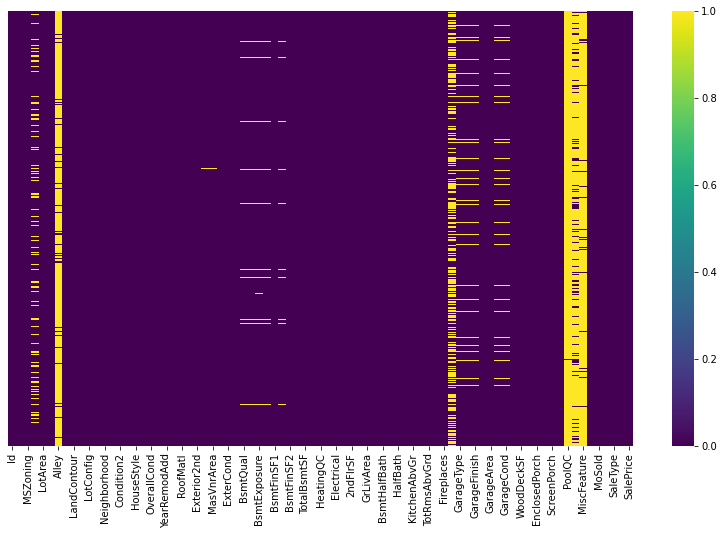

In [281]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.show()

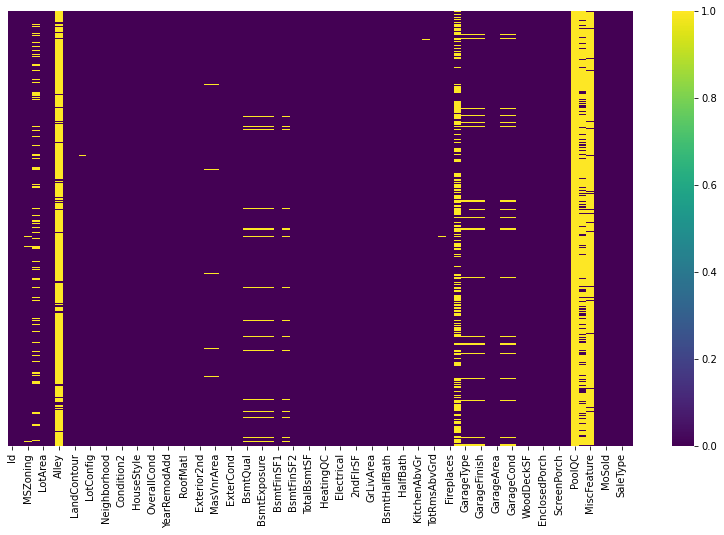

In [282]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels=False, cmap='viridis')
plt.show()

In [283]:
all_data_na = (train.isnull().sum()/len(train))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})

In [284]:
missing_data

,Missing Data
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [285]:
all_testdata_na = (test.isnull().sum()/len(test))*100
all_testdata_na = all_testdata_na.drop(all_testdata_na[all_testdata_na == 0].index).sort_values(ascending=False)[:15]
missing_testdata = pd.DataFrame({'Missing Data': all_testdata_na})

In [286]:
missing_testdata.head()

,Missing Data
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270


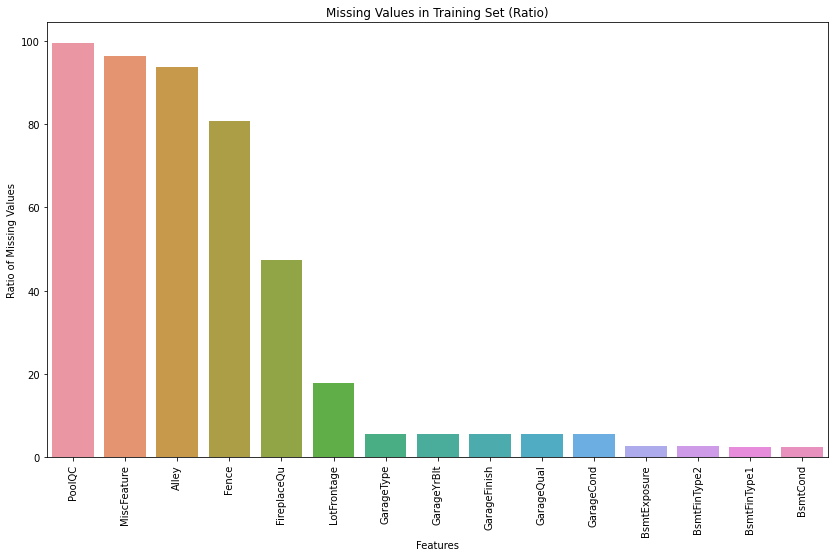

In [287]:
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x=all_data_na.index ,y=all_data_na)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ratio of Missing Values')
plt.title('Missing Values in Training Set (Ratio)')
plt.show()

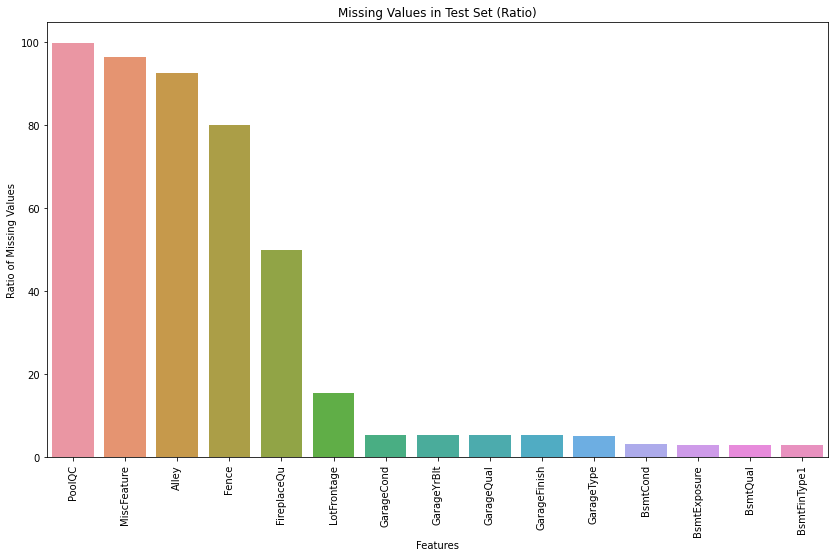

In [288]:
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x=all_testdata_na.index ,y=all_testdata_na)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ratio of Missing Values')
plt.title('Missing Values in Test Set (Ratio)')
plt.show()

In [289]:
for column in train.columns:
    print(column + ':', train[column].isnull().sum(), train[column].dtype)

Id: 0 int64
MSSubClass: 0 int64
MSZoning: 0 object
LotFrontage: 259 float64
LotArea: 0 int64
Street: 0 object
Alley: 1369 object
LotShape: 0 object
LandContour: 0 object
Utilities: 0 object
LotConfig: 0 object
LandSlope: 0 object
Neighborhood: 0 object
Condition1: 0 object
Condition2: 0 object
BldgType: 0 object
HouseStyle: 0 object
OverallQual: 0 int64
OverallCond: 0 int64
YearBuilt: 0 int64
YearRemodAdd: 0 int64
RoofStyle: 0 object
RoofMatl: 0 object
Exterior1st: 0 object
Exterior2nd: 0 object
MasVnrType: 8 object
MasVnrArea: 8 float64
ExterQual: 0 object
ExterCond: 0 object
Foundation: 0 object
BsmtQual: 37 object
BsmtCond: 37 object
BsmtExposure: 38 object
BsmtFinType1: 37 object
BsmtFinSF1: 0 int64
BsmtFinType2: 38 object
BsmtFinSF2: 0 int64
BsmtUnfSF: 0 int64
TotalBsmtSF: 0 int64
Heating: 0 object
HeatingQC: 0 object
CentralAir: 0 object
Electrical: 1 object
1stFlrSF: 0 int64
2ndFlrSF: 0 int64
LowQualFinSF: 0 int64
GrLivArea: 0 int64
BsmtFullBath: 0 int64
BsmtHalfBath: 0 int64
Fu

In [290]:
train.isnull().sum().idxmax()

'PoolQC'

In [291]:
train[(train['GarageYrBlt'].isnull()) & (train['YearBuilt'] >1800)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,N

In [292]:
for column in test.columns:
    print(column + ':', test[column].isnull().sum(), 'dtype: ', test[column].dtype)

Id: 0 dtype:  int64
MSSubClass: 0 dtype:  int64
MSZoning: 4 dtype:  object
LotFrontage: 227 dtype:  float64
LotArea: 0 dtype:  int64
Street: 0 dtype:  object
Alley: 1352 dtype:  object
LotShape: 0 dtype:  object
LandContour: 0 dtype:  object
Utilities: 2 dtype:  object
LotConfig: 0 dtype:  object
LandSlope: 0 dtype:  object
Neighborhood: 0 dtype:  object
Condition1: 0 dtype:  object
Condition2: 0 dtype:  object
BldgType: 0 dtype:  object
HouseStyle: 0 dtype:  object
OverallQual: 0 dtype:  int64
OverallCond: 0 dtype:  int64
YearBuilt: 0 dtype:  int64
YearRemodAdd: 0 dtype:  int64
RoofStyle: 0 dtype:  object
RoofMatl: 0 dtype:  object
Exterior1st: 1 dtype:  object
Exterior2nd: 1 dtype:  object
MasVnrType: 16 dtype:  object
MasVnrArea: 15 dtype:  float64
ExterQual: 0 dtype:  object
ExterCond: 0 dtype:  object
Foundation: 0 dtype:  object
BsmtQual: 44 dtype:  object
BsmtCond: 45 dtype:  object
BsmtExposure: 44 dtype:  object
BsmtFinType1: 42 dtype:  object
BsmtFinSF1: 1 dtype:  float64
Bsm

In [293]:
test.isnull().sum().idxmax()

'PoolQC'

In [294]:
#nan means house has no pool
train['PoolQC'].isnull().sum()

1453

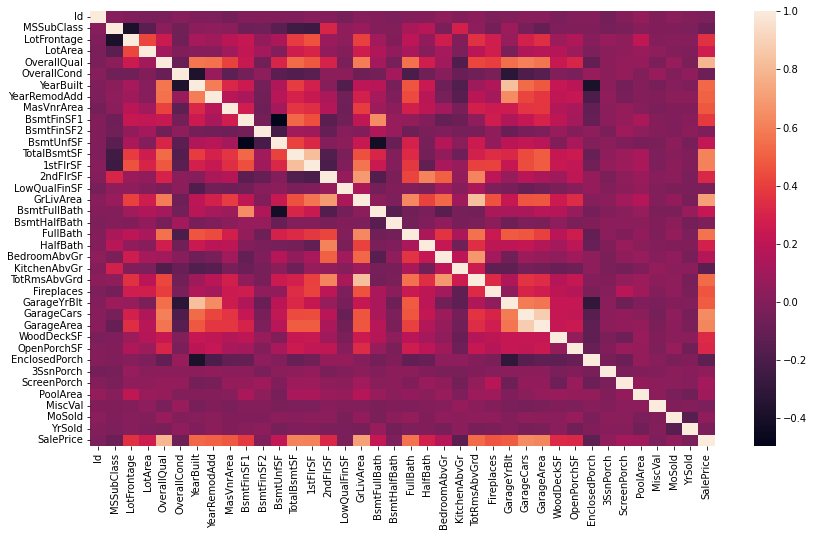

In [295]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr())
plt.show()

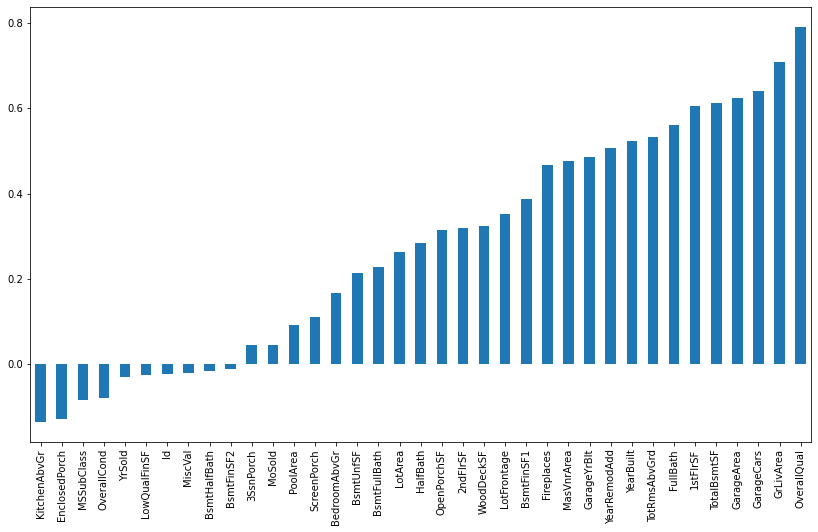

In [296]:
plt.figure(figsize=(14,8))
train.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [297]:
train.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
                   ...   
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, Length: 37, dtype: float64

In [298]:
train['SalePrice'].sort_values(ascending=True)[:10]

495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
Name: SalePrice, dtype: int64

In [299]:
#train = train.drop(index=[495,916,968,533,30,710,1337,1325,705,812,1380])


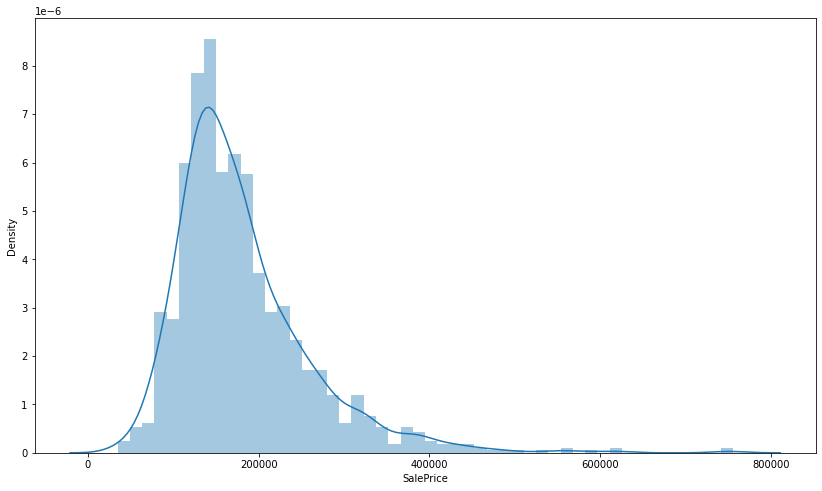

In [300]:
plt.figure(figsize=(14,8))
sns.distplot(train['SalePrice'], kde=True, bins=50)
plt.show()

In [301]:
train[train['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [302]:
## Remove outliers....prices > $600k
#train = train.drop(index=[691,898,1169,1182])


In [303]:
train[train['SalePrice'] < 50000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900


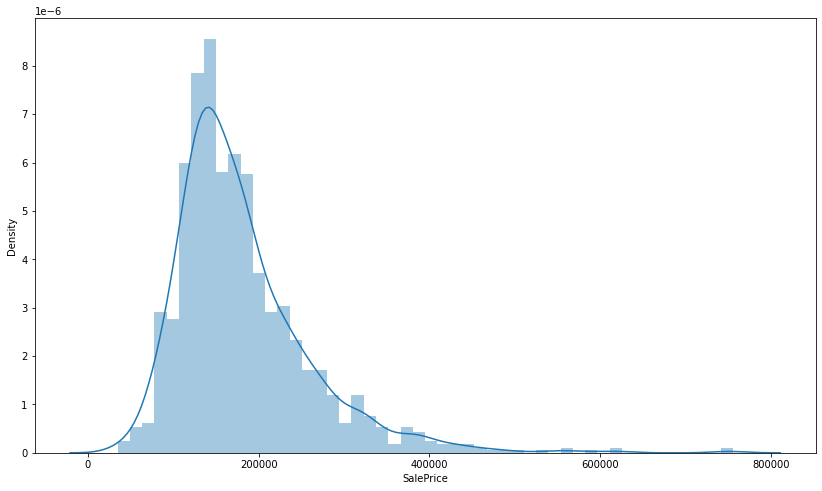

In [304]:
plt.figure(figsize=(14,8))
sns.distplot(train['SalePrice'], kde=True, bins=50)
plt.show()

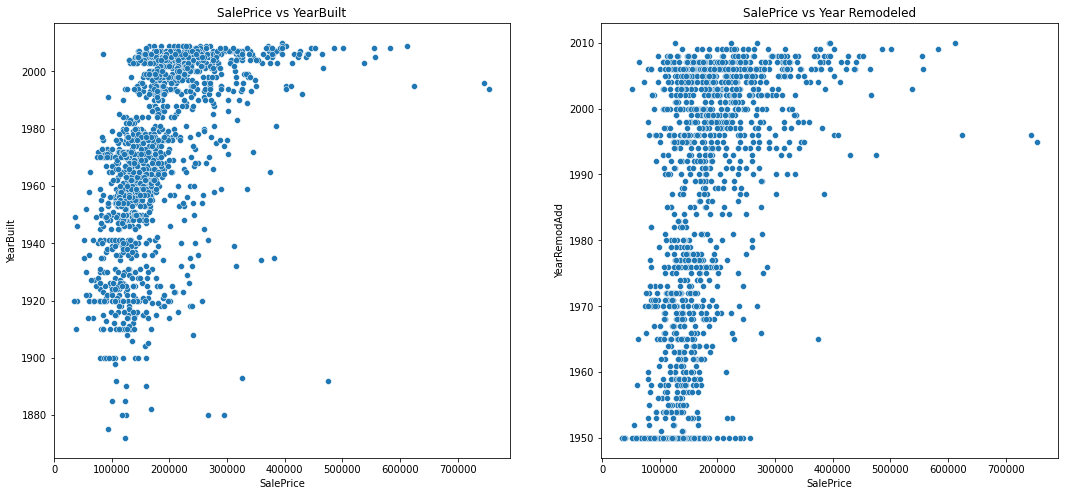

In [305]:
fig, axes = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x = 'SalePrice', y= 'YearBuilt', data=train, ax=axes[0])
sns.scatterplot(x = 'SalePrice', y='YearRemodAdd', data=train, ax=axes[1])
axes[0].set_title('SalePrice vs YearBuilt')
axes[1].set_title('SalePrice vs Year Remodeled')
plt.show()

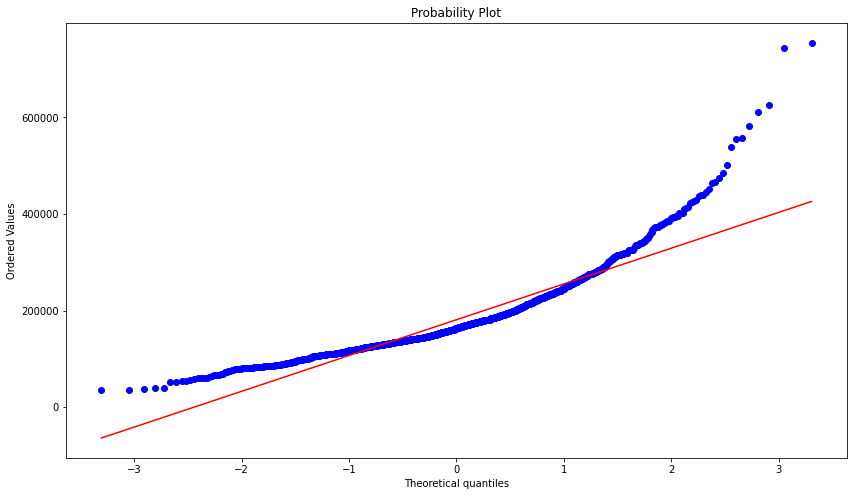

In [306]:
plt.figure(figsize=(14,8))
stats.probplot(train['SalePrice'],plot=plt,dist='norm')
plt.show()

In [307]:
train['LogSalePrice'] = np.log(train['SalePrice'])

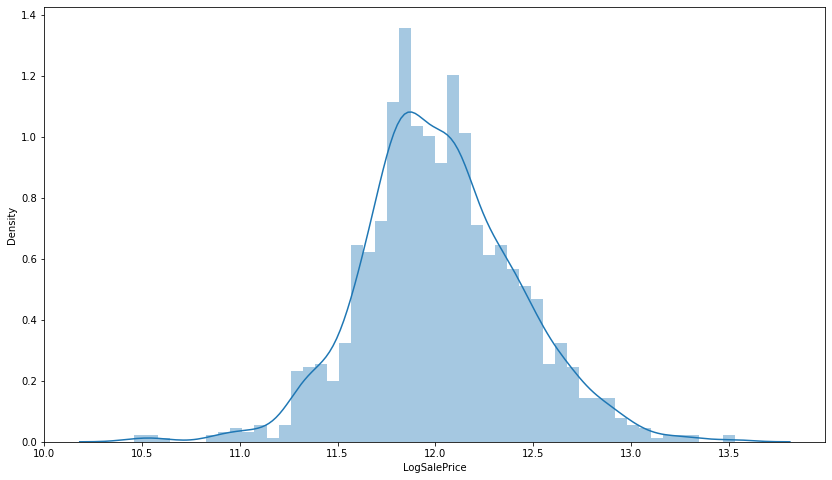

In [308]:
plt.figure(figsize=(14,8))
sns.distplot(train['LogSalePrice'], kde=True, bins=50)
plt.show()

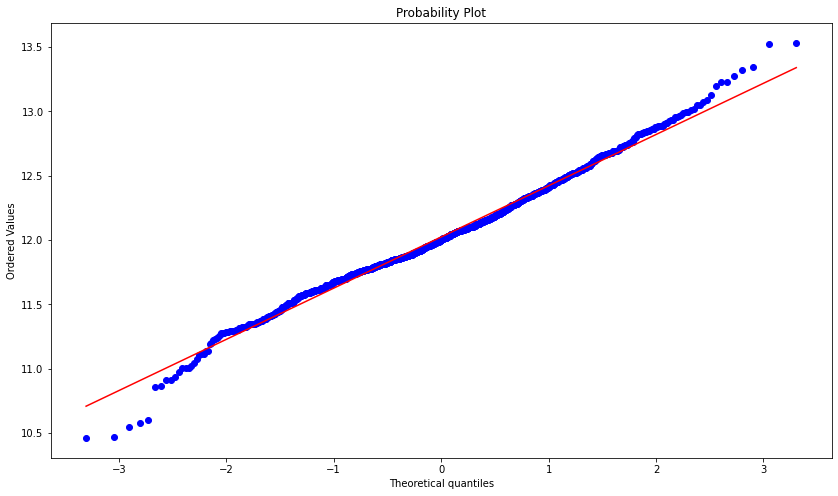

In [309]:
plt.figure(figsize=(14,8))
stats.probplot(train['LogSalePrice'],plot=plt,dist='norm')
plt.show()

<AxesSubplot:ylabel='LogSalePrice'>

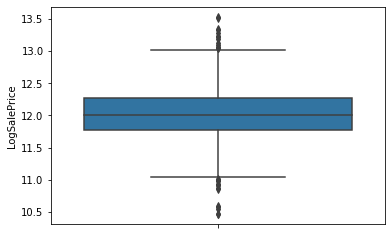

In [310]:
sns.boxplot(data=train,y = 'LogSalePrice',)

In [311]:
train['LogSalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: LogSalePrice, dtype: float64

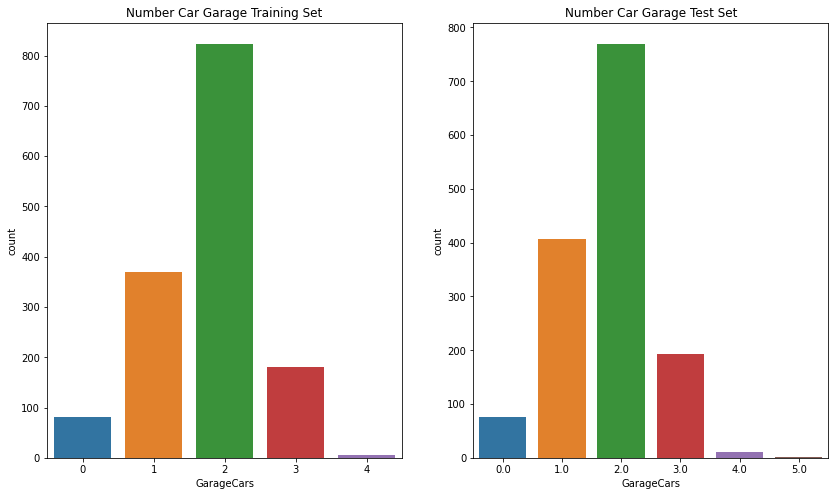

In [312]:
fig,ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot(data = train, x='GarageCars', ax=ax[0])
sns.countplot(data = test, x ='GarageCars', ax=ax[1])
ax[0].set_title('Number Car Garage Training Set')
ax[1].set_title('Number Car Garage Test Set')
plt.show()

In [313]:
print(train['GarageCars'].value_counts())
print(test['GarageCars'].value_counts())
print(train['GarageCars'].isnull().sum())
print(test['GarageCars'].isnull().sum())


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64
0
1


In [314]:
print(train['GrLivArea'].value_counts())
print(test['GrLivArea'].value_counts())
print(train['GrLivArea'].isnull().sum())
print(test['GrLivArea'].isnull().sum())

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64
864     19
1092    18
1040    11
1456    10
1200     9
        ..
1570     1
2133     1
1988     1
1036     1
970      1
Name: GrLivArea, Length: 879, dtype: int64
0
0


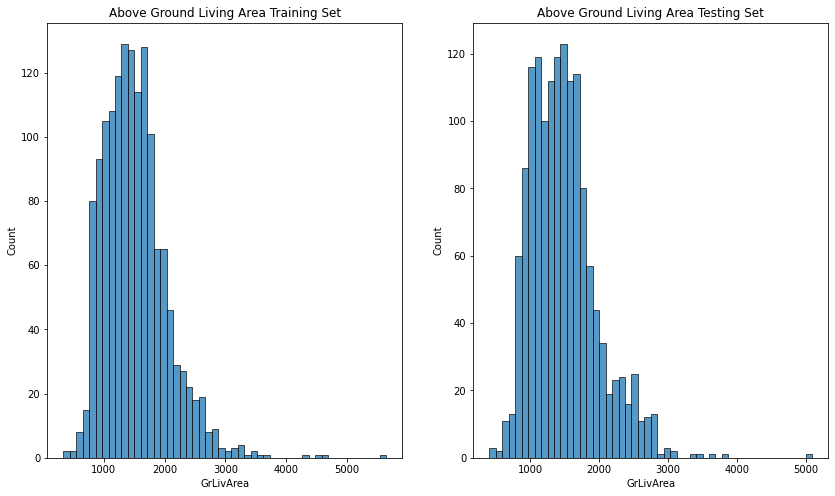

In [315]:
fig,ax = plt.subplots(1,2, figsize=(14,8))
sns.histplot(x=train['GrLivArea'], ax=ax[0], bins=50)
sns.histplot(x =test['GrLivArea'],ax=ax[1], bins=50)
ax[0].set_title('Above Ground Living Area Training Set')
ax[1].set_title('Above Ground Living Area Testing Set')
plt.show()

In [316]:
print('mode: ', train['SalePrice'].mode())
print('median: ', train['SalePrice'].median())
print('mean: ', train['SalePrice'].mean())
print('min: ', train['SalePrice'].min())
print('max: ', train['SalePrice'].max())
print(train['SalePrice'].count())

mode:  0    140000
dtype: int64
median:  163000.0
mean:  180921.19589041095
min:  34900
max:  755000
1460


In [317]:
for i in train.columns:
    print(i + ': ', train[i].dtypes)

Id:  int64
MSSubClass:  int64
MSZoning:  object
LotFrontage:  float64
LotArea:  int64
Street:  object
Alley:  object
LotShape:  object
LandContour:  object
Utilities:  object
LotConfig:  object
LandSlope:  object
Neighborhood:  object
Condition1:  object
Condition2:  object
BldgType:  object
HouseStyle:  object
OverallQual:  int64
OverallCond:  int64
YearBuilt:  int64
YearRemodAdd:  int64
RoofStyle:  object
RoofMatl:  object
Exterior1st:  object
Exterior2nd:  object
MasVnrType:  object
MasVnrArea:  float64
ExterQual:  object
ExterCond:  object
Foundation:  object
BsmtQual:  object
BsmtCond:  object
BsmtExposure:  object
BsmtFinType1:  object
BsmtFinSF1:  int64
BsmtFinType2:  object
BsmtFinSF2:  int64
BsmtUnfSF:  int64
TotalBsmtSF:  int64
Heating:  object
HeatingQC:  object
CentralAir:  object
Electrical:  object
1stFlrSF:  int64
2ndFlrSF:  int64
LowQualFinSF:  int64
GrLivArea:  int64
BsmtFullBath:  int64
BsmtHalfBath:  int64
FullBath:  int64
HalfBath:  int64
BedroomAbvGr:  int64
Kitche

In [318]:
print('train\n',train.dtypes.value_counts())
print('test\n',test.dtypes.value_counts())

train
 object     43
int64      35
float64     4
dtype: int64
test
 object     43
int64      26
float64    11
dtype: int64


In [319]:
print(train['Street'].value_counts())
print(train['Street'].isnull().sum())

Pave    1454
Grvl       6
Name: Street, dtype: int64
0


In [320]:
print(train['Alley'].value_counts())
print(train['Alley'].isnull().sum())

Grvl    50
Pave    41
Name: Alley, dtype: int64
1369


In [321]:
print(test['Alley'].value_counts())
print(test['Alley'].isnull().sum())

Grvl    70
Pave    37
Name: Alley, dtype: int64
1352


# Working with the Missing Data Pt. 1

In [322]:
### Will go column by column to work in imputing data. Determine which columns we save and
### which ones we delete. Obvious ones are Alley and Fence...they stand out immediately


In [323]:
## Greater than 50% data missing..will be hard to fill in...let's drop
for column in train.columns:
    if train[column].isnull().sum()/len(train) > .50:
        print(column)

Alley
PoolQC
Fence
MiscFeature


In [324]:
#### I am going to keep PoolQuality for now
train = train.drop(['Alley','Fence','FireplaceQu','MiscFeature'],axis=1)


In [325]:
for column in test.columns:
    if test[column].isnull().sum()/len(test) > .50:
        print(column)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [326]:
#### Keep PoolQuality here as well
test = test.drop(['FireplaceQu','Alley','Fence','MiscFeature'],axis=1)


In [327]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))


# Visualization Pt. 2

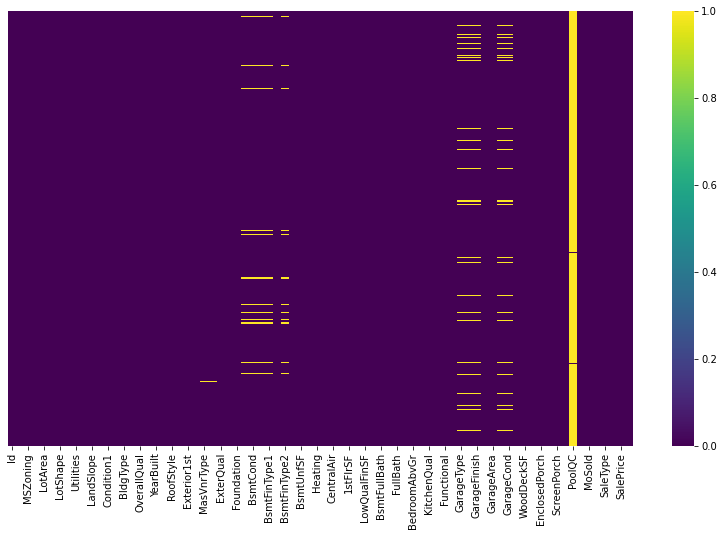

In [328]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.show()

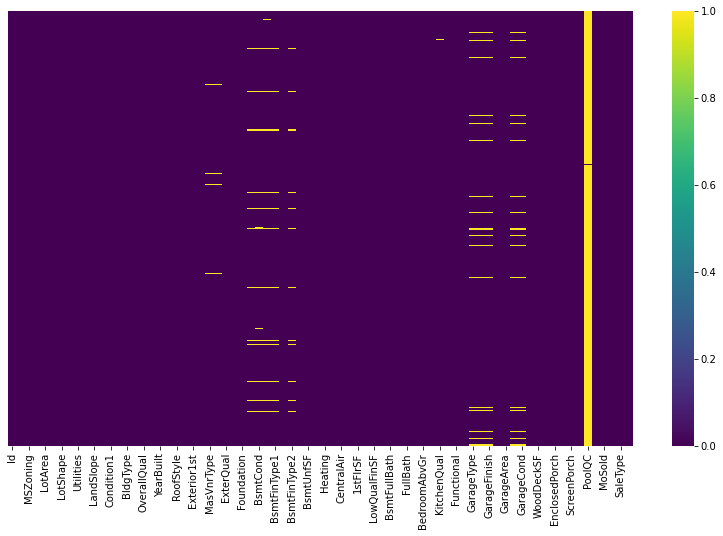

In [329]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels=False, cmap='viridis')
plt.show()

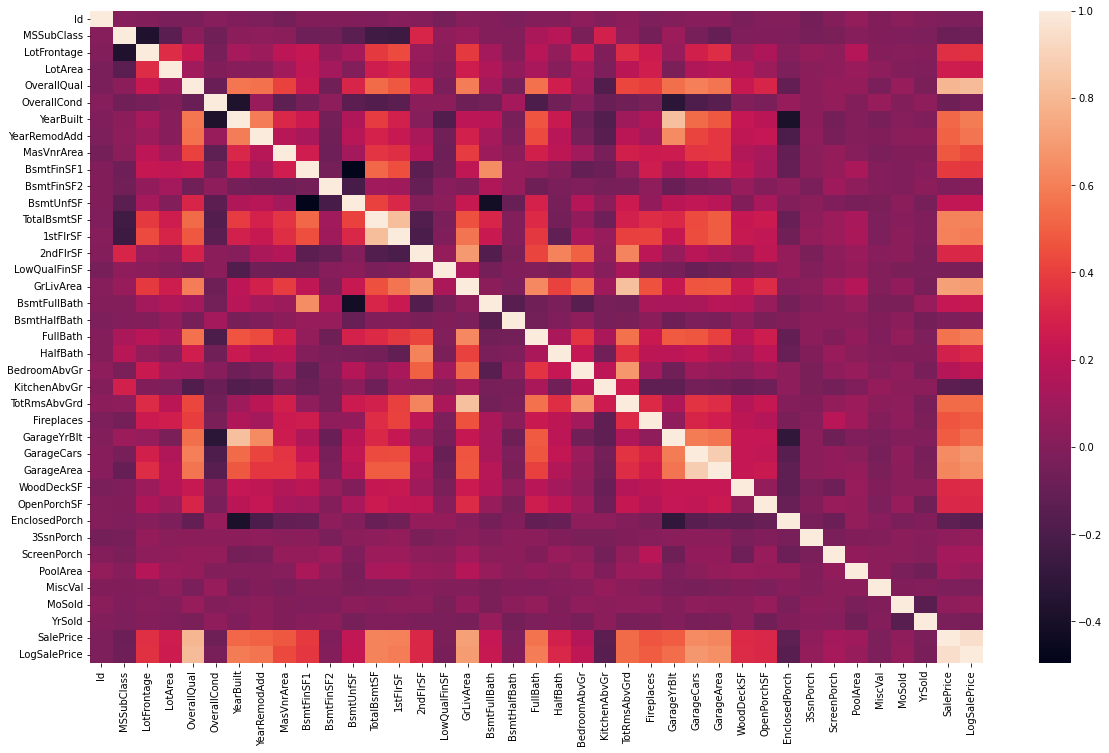

In [330]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), annot=False)
plt.show()

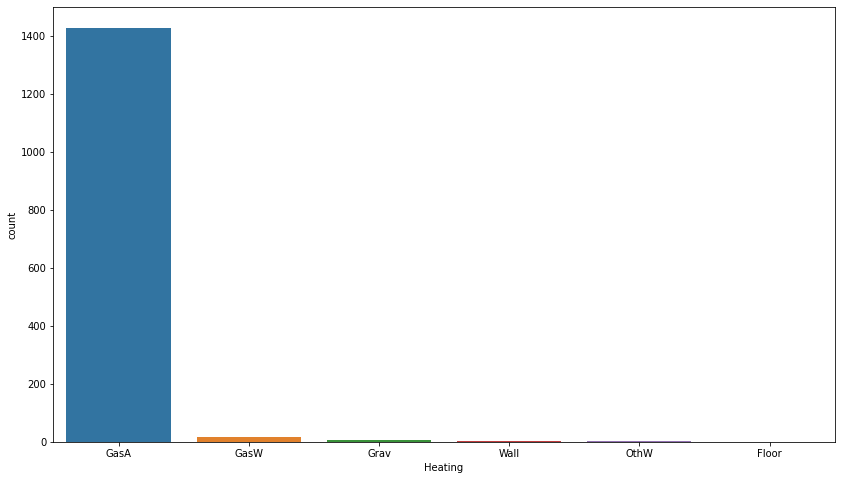

In [331]:
plt.figure(figsize=(14,8))
sns.countplot(data = train, x= train['Heating'])
plt.show()

In [332]:
train['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

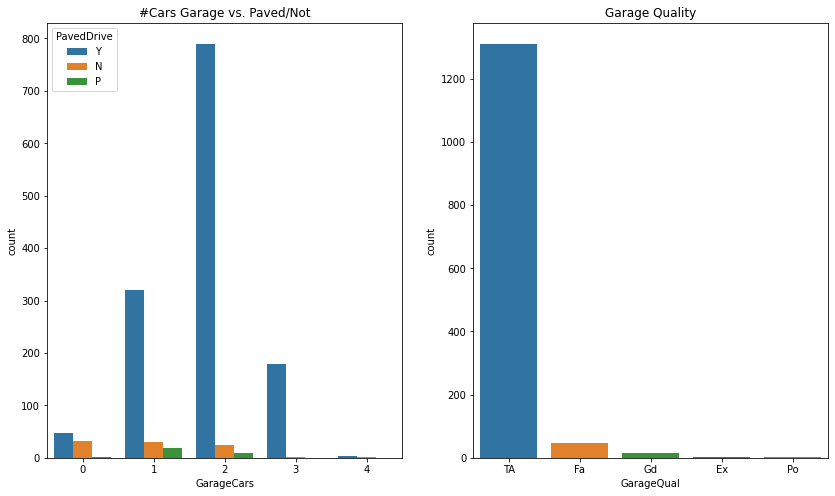

In [333]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train,x = 'GarageCars', hue = 'PavedDrive', ax=ax[0])
sns.countplot(data = train, x = 'GarageQual', ax=ax[1])
ax[0].set_title('#Cars Garage vs. Paved/Not')
ax[1].set_title('Garage Quality')
plt.show()

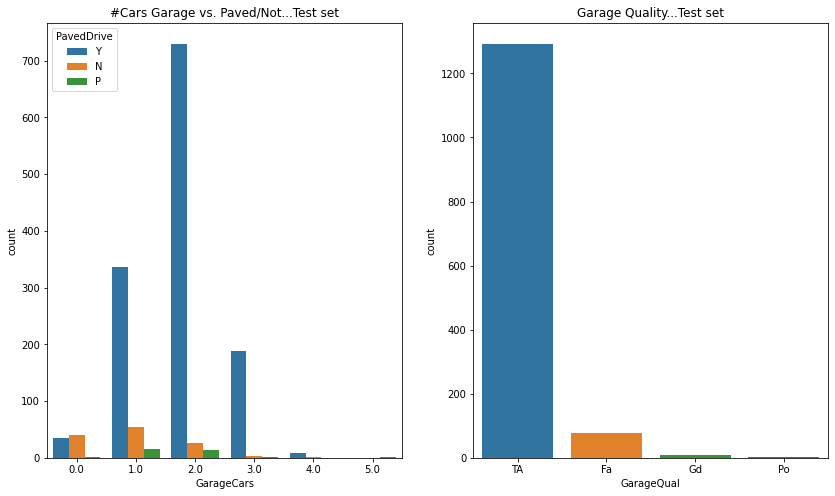

In [334]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=test,x = 'GarageCars', hue = 'PavedDrive', ax=ax[0])
sns.countplot(data = test, x = 'GarageQual', ax=ax[1])
ax[0].set_title('#Cars Garage vs. Paved/Not...Test set')
ax[1].set_title('Garage Quality...Test set')
plt.show()

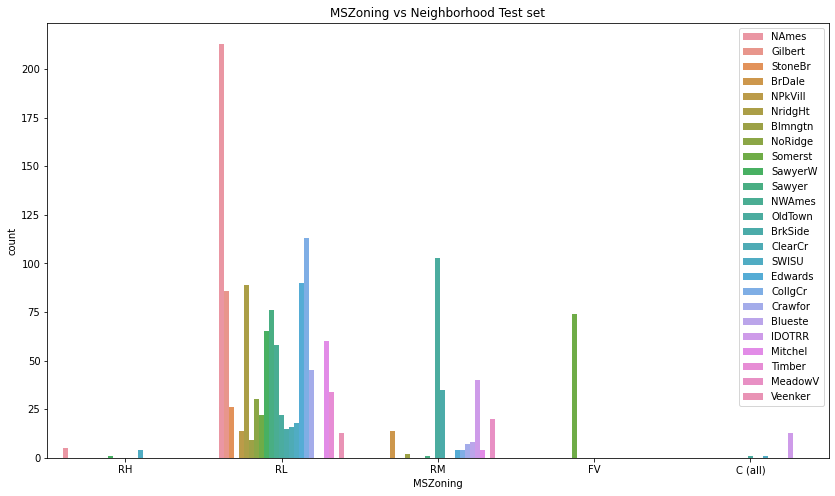

In [335]:
plt.figure(figsize=(14,8))
sns.countplot(data=test, x='MSZoning', hue = 'Neighborhood')
plt.title('MSZoning vs Neighborhood Test set')
plt.legend(loc=1)
plt.show()

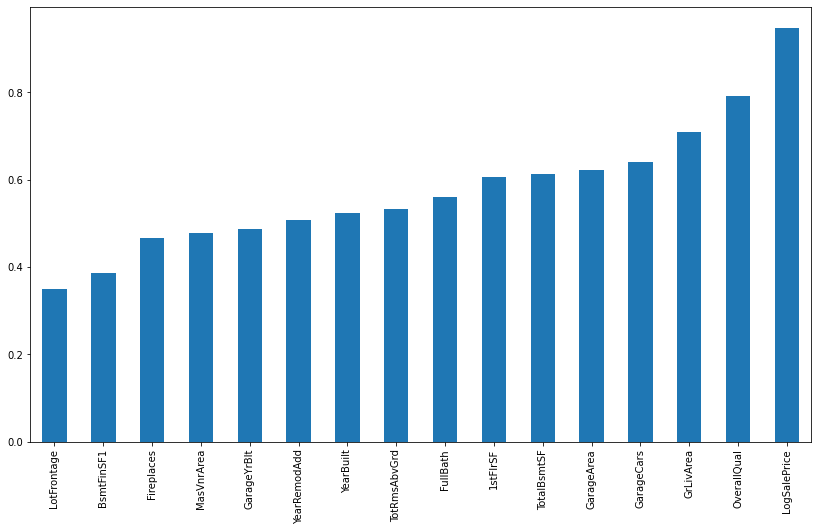

In [336]:
#### Top 15 correlations with Sales Price....
plt.figure(figsize=(14,8))
train.corr()['SalePrice'].sort_values()[22:-1].plot(kind='bar')
plt.show()

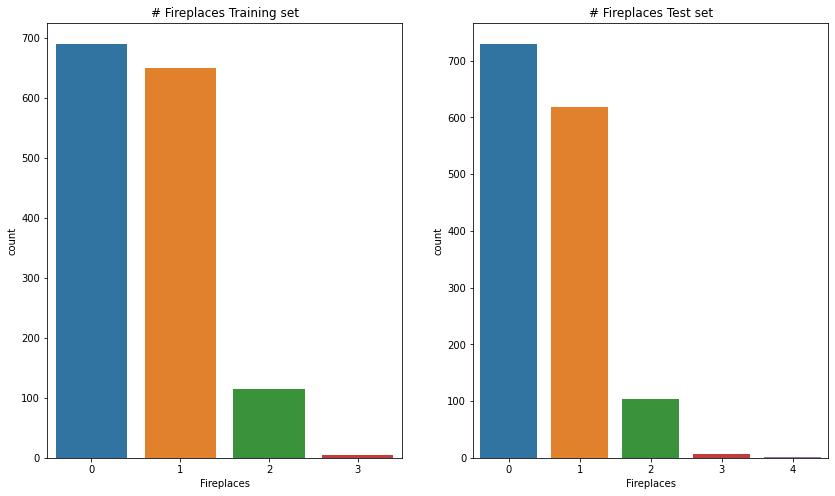

In [337]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train, x='Fireplaces', ax=ax[0])
sns.countplot(data=test, x='Fireplaces', ax=ax[1])
ax[0].set_title('# Fireplaces Training set')
ax[1].set_title('# Fireplaces Test set')
plt.show()

# Working with Missing Data Pt. 2 #

In [338]:
print(train['GarageQual'].isnull().sum())
print(test['GarageQual'].isnull().sum())

81
78


In [339]:
#### Check missing values for those Features that have highest correlation to SalePrice
print('OverallQual_Train',train['OverallQual'].isnull().sum())
print('OverallQual_Test',test['OverallQual'].isnull().sum())
print('GarageQual_Train',train['GarageQual'].isnull().sum())
print('GarageQual_Test',test['GarageQual'].isnull().sum())
print('GrLivArea_Train',train['GrLivArea'].isnull().sum())
print('GrLivArea_Test',test['GrLivArea'].isnull().sum())
print('GarageCars_Train',train['GarageCars'].isnull().sum())
print('GarageCars_Test',test['GarageCars'].isnull().sum())
print('TotalBsmtSF_Train',train['TotalBsmtSF'].isnull().sum())
print('TotalBmstSF_Test',test['TotalBsmtSF'].isnull().sum())
print('1stFlrSF_Train',train['1stFlrSF'].isnull().sum())
print('1stFlrSF_test',test['1stFlrSF'].isnull().sum())
print('FullBath',train['FullBath'].isnull().sum())
print('FullBath',test['FullBath'].isnull().sum())
print('TotalRmsAbvGrd_Train',train['TotRmsAbvGrd'].isnull().sum())
print('TotalRmsAbvGrd_Test',test['TotRmsAbvGrd'].isnull().sum())
print('YearBuilt_Train',train['YearBuilt'].isnull().sum())
print('YearBuilt_Test',test['YearBuilt'].isnull().sum())
print('YearRemodeled_Train',train['YearRemodAdd'].isnull().sum())
print('YearRemodeled_Test',test['YearRemodAdd'].isnull().sum())

OverallQual_Train 0
OverallQual_Test 0
GarageQual_Train 81
GarageQual_Test 78
GrLivArea_Train 0
GrLivArea_Test 0
GarageCars_Train 0
GarageCars_Test 1
TotalBsmtSF_Train 0
TotalBmstSF_Test 1
1stFlrSF_Train 0
1stFlrSF_test 0
FullBath 0
FullBath 0
TotalRmsAbvGrd_Train 0
TotalRmsAbvGrd_Test 0
YearBuilt_Train 0
YearBuilt_Test 0
YearRemodeled_Train 0
YearRemodeled_Test 0


In [340]:
train['GarageQual'] = train['GarageQual'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')

In [341]:
test['MSZoning'] = test.groupby('Neighborhood')['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))

In [342]:
test[test['TotalBsmtSF'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,0,4,2008,ConLD,Abnorml


In [343]:
test['GarageType'].isnull().sum()

76

In [344]:
test[test['GarageType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.0,13260,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,Y,0,0,0,0,0,0,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.0,4485,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,NaN,NaN,NaN,0.0,0.0,None,NaN,P,51,0,135,0,0,0,NaN,0,5,2010,WD,Normal
79,1540,190,RM,100.0,9045,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,N,0,18,18,0,0,0,NaN,0,6,2010,WD,Abnorml
92,1553,70,RM,60.0,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,N,344,0,0,0,168,0,NaN,0,5,2010,WD,Normal
96,1557,190,RL,60.0,9900,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,N,0,0,168,0,0,0,NaN,0,2,2010,ConLD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2894,50,C (all),60.0,8520,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Fa,Fa,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,Fa,N,SBrkr,576,360,0,936,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,N,0,0,0,0,0,0,NaN,0,4,2006,WD,Normal
1449,2910,180,RM,21.0,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,Y,0,0,0,0,0,0,NaN,0,4,2006,WD,Normal
1453,2914,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,Y,0,34,0,0,0,0,NaN,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,None,NaN,Y,0,0,0,0,0,0,NaN,0,6,2006,WD,Normal


In [345]:
train['BsmtQual'].isnull().sum()


37

In [346]:
df = train[train['BsmtQual'].isnull()]

In [347]:
df[df.columns[30:35]].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
17,NaN,NaN,NaN,0,NaN
39,NaN,NaN,NaN,0,NaN
90,NaN,NaN,NaN,0,NaN
102,NaN,NaN,NaN,0,NaN
156,NaN,NaN,NaN,0,NaN


In [348]:
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')

In [349]:
print(train['BsmtCond'].isnull().sum())
print(train['BsmtExposure'].isnull().sum())
print(train['BsmtFinType1'].isnull().sum())
print(train['BsmtFinType2'].isnull().sum())

0
0
0
0


In [350]:
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [351]:
print(test['BsmtCond'].isnull().sum())
print(test['BsmtExposure'].isnull().sum())
print(test['BsmtFinType1'].isnull().sum())
print(test['BsmtFinType2'].isnull().sum())

0
0
0
0


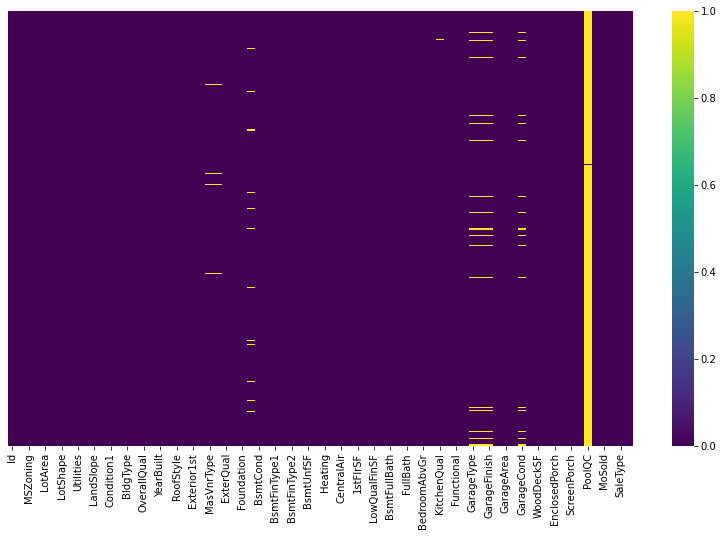

In [352]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels=False, cmap = 'viridis')
plt.show()

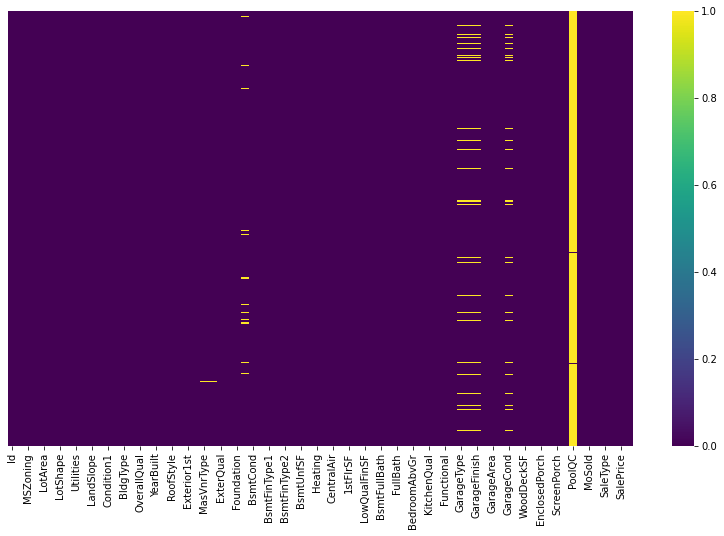

In [353]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap = 'viridis')
plt.show()

In [354]:
train['MasVnrType'].isnull().sum()

8

In [355]:
train[train['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
234,235,60,RL,65.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,0,5,2010,WD,Normal,216500,12.285346
529,530,20,RL,74.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,0,3,2007,WD,Alloca,200624,12.209188
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,0,5,2008,WD,Normal,205950,12.235389
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,0,8,2009,WD,Normal,184900,12.127570
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,0,12,2008,New,Partial,182000,12.111762
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,0,11,2007,New,Partial,199900,12.205573
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,0,9,2006,New,Partial,465000,13.049793
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,0,3,2008,WD,Normal,237000,12.375815


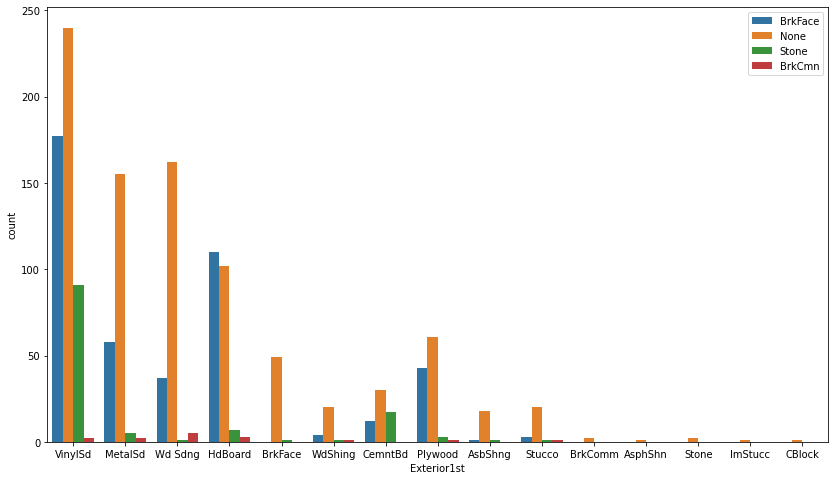

In [356]:
plt.figure(figsize=(14,8))
sns.countplot(data=train, x = 'Exterior1st', hue = 'MasVnrType')
plt.legend(loc=1)
plt.show()

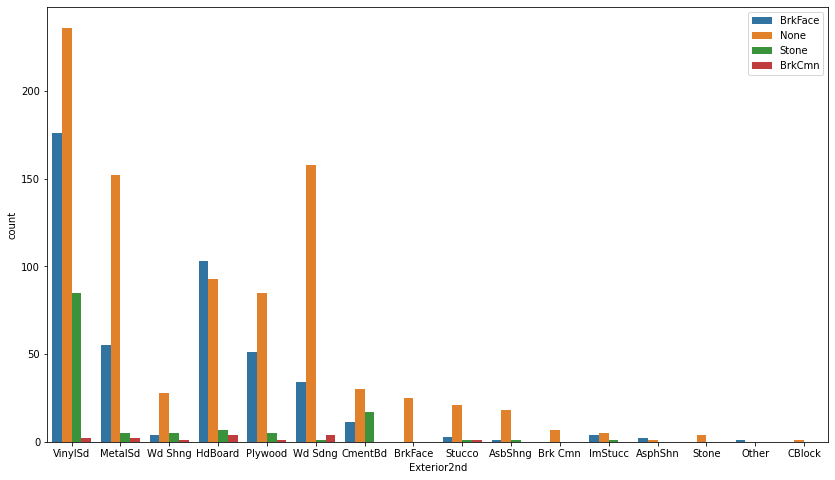

In [357]:
plt.figure(figsize=(14,8))
sns.countplot(data=train, x = 'Exterior2nd', hue = 'MasVnrType')
plt.legend(loc=1)
plt.show()

In [358]:
def mason_veneer(cols):
    
    MasonType = cols[0]
    Exterior1 = cols[1]
    
    if pd.isnull(MasonType):
        if Exterior1 == 'Vinyl':
            return 'None'
        elif Exterior1 == 'HdBoard':
            return 'BrkFace'
        else:
            return 'None'
    else:
        return MasonType
    

In [359]:
train['MasVnrType'] = train[['MasVnrType','Exterior1st']].apply(mason_veneer,axis=1)

In [360]:
test['MasVnrType'] = test[['MasVnrType','Exterior1st']].apply(mason_veneer,axis=1)

In [361]:
train[train['MasVnrType'] == 'None'][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


<AxesSubplot:>

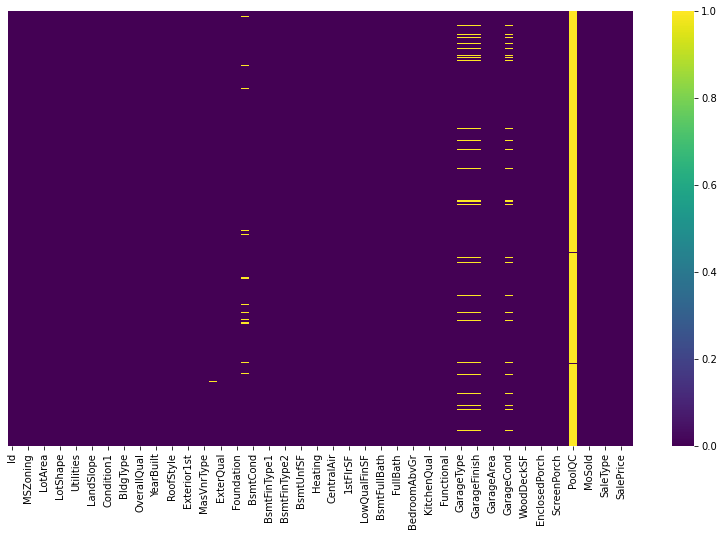

In [362]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap = 'viridis')

<AxesSubplot:>

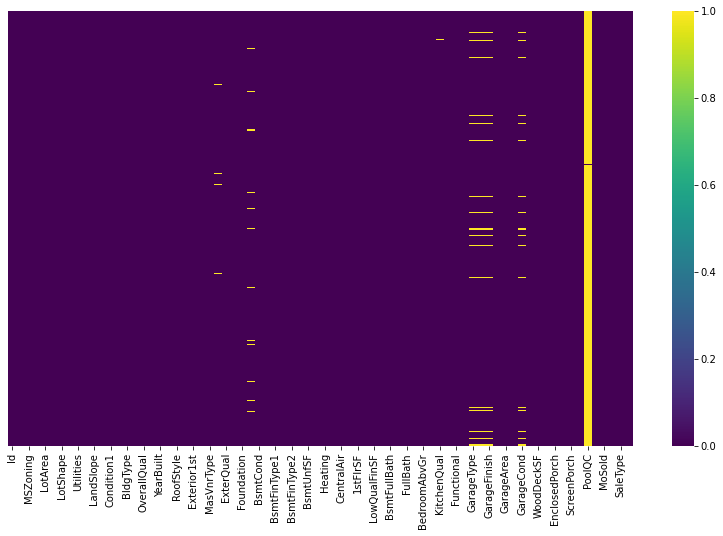

In [363]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels=False, cmap = 'viridis')

In [364]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [365]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

<AxesSubplot:>

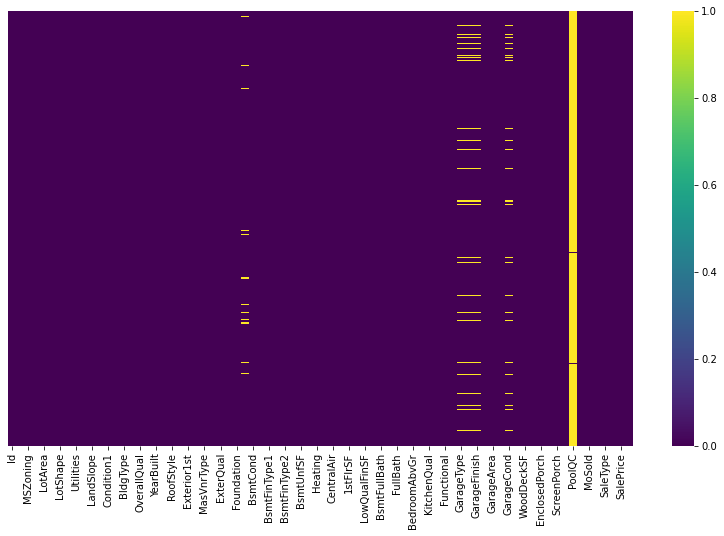

In [366]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap = 'viridis')

<AxesSubplot:>

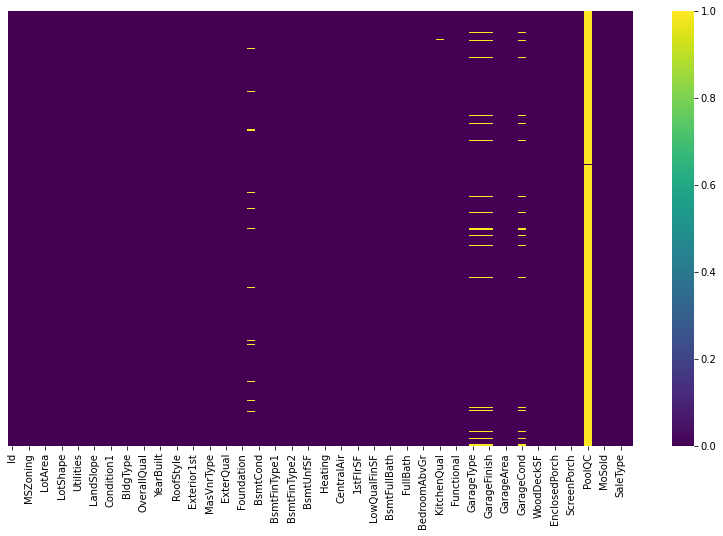

In [367]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels=False, cmap = 'viridis')

In [368]:
for column in test.columns:
    print(column + ':', test[column].isnull().sum(), test[column].dtype)

Id: 0 int64
MSSubClass: 0 int64
MSZoning: 0 object
LotFrontage: 0 float64
LotArea: 0 int64
Street: 0 object
LotShape: 0 object
LandContour: 0 object
Utilities: 2 object
LotConfig: 0 object
LandSlope: 0 object
Neighborhood: 0 object
Condition1: 0 object
Condition2: 0 object
BldgType: 0 object
HouseStyle: 0 object
OverallQual: 0 int64
OverallCond: 0 int64
YearBuilt: 0 int64
YearRemodAdd: 0 int64
RoofStyle: 0 object
RoofMatl: 0 object
Exterior1st: 1 object
Exterior2nd: 1 object
MasVnrType: 0 object
MasVnrArea: 0 float64
ExterQual: 0 object
ExterCond: 0 object
Foundation: 0 object
BsmtQual: 44 object
BsmtCond: 0 object
BsmtExposure: 0 object
BsmtFinType1: 0 object
BsmtFinSF1: 1 float64
BsmtFinType2: 0 object
BsmtFinSF2: 1 float64
BsmtUnfSF: 1 float64
TotalBsmtSF: 1 float64
Heating: 0 object
HeatingQC: 0 object
CentralAir: 0 object
Electrical: 0 object
1stFlrSF: 0 int64
2ndFlrSF: 0 int64
LowQualFinSF: 0 int64
GrLivArea: 0 int64
BsmtFullBath: 2 float64
BsmtHalfBath: 2 float64
FullBath: 0 int

In [369]:
#### After further review, i will drop all features related to Pool...99% of the homes
#### have no pool

train = train.drop(['PoolArea', 'PoolQC'],axis=1)



In [370]:
test = test.drop(['PoolArea', 'PoolQC'],axis=1)


In [371]:
train = train.drop(['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope'],axis=1)

In [372]:
test = test.drop(['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope'],axis=1)

In [373]:
train = train.drop('Condition2', axis=1)
test = test.drop('Condition2', axis=1)

In [374]:
train = train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)
test = test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

In [375]:
train = train.drop(['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond'],axis=1)
test = test.drop(['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond'],axis=1)

In [376]:
train = train.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1)
test = test.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1)

In [377]:
train = train.drop(['RoofStyle','RoofMatl','BsmtFinType2'],axis=1)
test = test.drop(['RoofStyle','RoofMatl','BsmtFinType2'],axis=1)


In [378]:
train = train.drop(['Exterior2nd','BsmtExposure','Electrical','MiscVal'],axis=1)
test = test.drop(['Exterior2nd','BsmtExposure','Electrical','MiscVal'],axis=1)

In [379]:
#### I am going to drop Functional. 93% of the data is Typ, with only 1 sever
train = train.drop('Functional',axis=1)
test = test.drop('Functional',axis=1)

In [380]:
train = train.drop(['MasVnrType','MasVnrArea'],axis=1)
test = test.drop(['MasVnrType','MasVnrArea'],axis=1)

In [381]:
train = train.drop('BsmtFinType1',axis=1)
test = test.drop('BsmtFinType1',axis=1)

In [382]:
train = train.drop('SaleType',axis=1)
test = test.drop('SaleType',axis=1)

In [383]:
train['TotHalfBaths'] = train['BsmtHalfBath'] + train['HalfBath']
train['TotalFullBaths'] = train['BsmtFullBath'] + train['FullBath']
test['TotHalfBaths'] = test['BsmtHalfBath'] + test['HalfBath']
test['TotalFullBaths'] = test['BsmtFullBath'] + test['FullBath']

In [384]:
train = train.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)
test = test.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

In [385]:
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(round(test['TotalBsmtSF'].mean(),0))

In [386]:
test['GarageCars'] = test['GarageCars'].fillna(0)

In [387]:
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])


In [388]:
test['BsmtQual'] = test['BsmtQual'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')

In [389]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [390]:
train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

# Quick Sanity Check on Missing Values so we can fill them and be done #

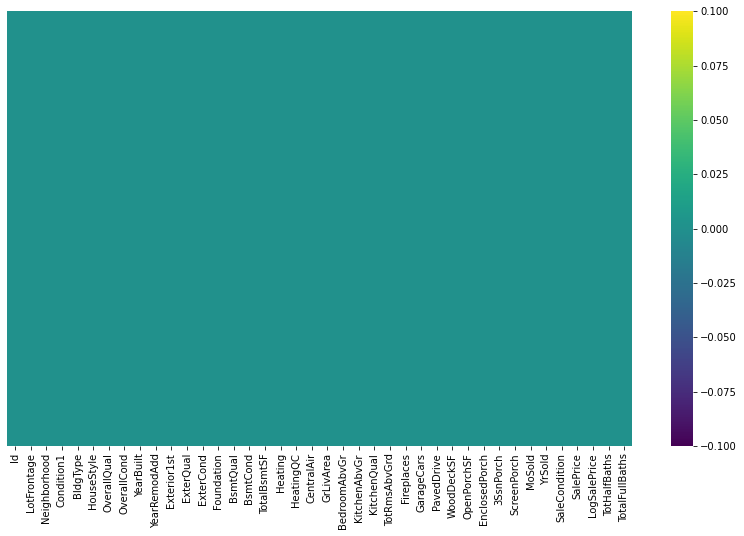

In [391]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels = False,cmap='viridis')
plt.show()

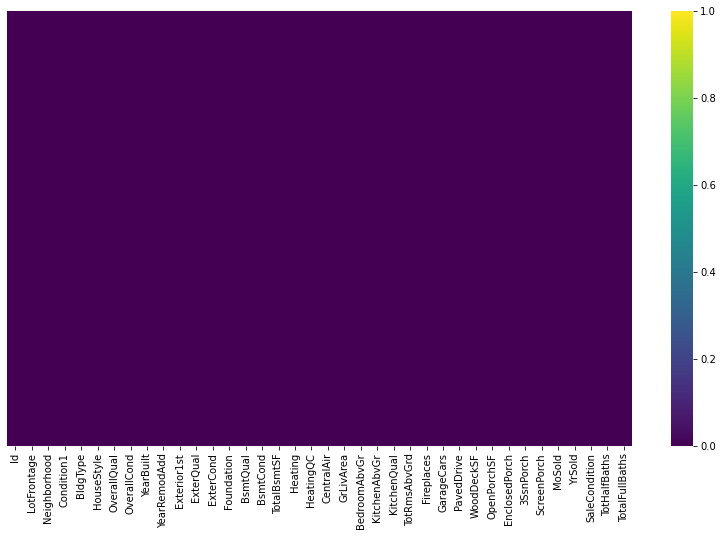

In [392]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels = False,cmap='viridis')
plt.show()

In [393]:
train['TotHalfBaths'] = train['TotHalfBaths'].fillna(train['TotHalfBaths'].mode()[0])
test['TotHalfBaths'] = test['TotHalfBaths'].fillna(test['TotHalfBaths'].mode()[0])
train['TotalFullBaths'] = train['TotalFullBaths'].fillna(train['TotalFullBaths'].mode()[0])
test['TotalFullBaths'] = test['TotalFullBaths'].fillna(test['TotalFullBaths'].mode()[0])

# Feature Encoding #

In [394]:
train['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [395]:
heatingqc_mapping = {'Ex':0,'TA':1,'Gd':2,'Fa':3,'Po':4}

In [396]:
train['HeatingQC'] = train['HeatingQC'].map(heatingqc_mapping)
test['HeatingQC'] = test['HeatingQC'].map(heatingqc_mapping)

In [397]:
train.head()

,Id,LotFrontage,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleCondition,SalePrice,LogSalePrice,TotHalfBaths,TotalFullBaths
0,1,65.0,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,VinylSd,Gd,TA,PConc,Gd,TA,856,GasA,0,Y,1710,3,1,Gd,8,0,2,Y,0,61,0,0,0,2,2008,Normal,208500,12.247694,1,3
1,2,80.0,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,MetalSd,TA,TA,CBlock,Gd,TA,1262,GasA,0,Y,1262,3,1,TA,6,1,2,Y,298,0,0,0,0,5,2007,Normal,181500,12.109011,1,2
2,3,68.0,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,VinylSd,Gd,TA,PConc,Gd,TA,920,GasA,0,Y,1786,3,1,Gd,6,1,2,Y,0,42,0,0,0,9,2008,Normal,223500,12.317167,1,3
3,4,60.0,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Wd Sdng,TA,TA,BrkTil,TA,Gd,756,GasA,2,Y,1717,3,1,Gd,7,1,3,Y,0,35,272,0,0,2,2006,Abnorml,140000,11.849398,0,2
4,5,84.0,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,VinylSd,Gd,TA,PConc,Gd,TA,1145,GasA,0,Y,2198,4,1,Gd,9,1,3,Y,192,84,0,0,0,12,2008,Normal,250000,12.429216,1,3


In [398]:
print(train['HouseStyle'].value_counts())
print(test['HouseStyle'].value_counts())

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64


In [399]:
housestyle_mapping = {'1Story':0,'2Story':1,'1.5Fin':2,'SLvl':3,'SFoyer':4,'1.5Unf':5,'2.5Unf':6,'2.5Fin':7}

In [400]:
train['HouseStyle'] = train['HouseStyle'].map(housestyle_mapping)
test['HouseStyle'] = test['HouseStyle'].map(housestyle_mapping)

In [401]:
print(train['BsmtCond'].value_counts())
print(test['BsmtCond'].value_counts())

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
TA      1295
Fa        59
Gd        57
None      45
Po         3
Name: BsmtCond, dtype: int64


In [402]:
bsmtcond_mapping = {'None':0,'TA':1, 'Gd':2,'Fa':3,'Po':4}

In [403]:
train['BsmtCond'] = train['BsmtCond'].map(bsmtcond_mapping)
test['BsmtCond'] = test['BsmtCond'].map(bsmtcond_mapping)

In [404]:
train['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [405]:
extercond_mapping = {'TA':0,'Gd':1,'Fa':2,'Ex':3,'Po':4}

In [406]:
train['ExterCond'] = train['ExterCond'].map(extercond_mapping)
test['ExterCond'] = test['ExterCond'].map(extercond_mapping)

In [407]:
print(train['ExterCond'].value_counts())
print(test['ExterCond'].value_counts())

0    1282
1     146
2      28
3       3
4       1
Name: ExterCond, dtype: int64
0    1256
1     153
2      39
3       9
4       2
Name: ExterCond, dtype: int64


In [408]:
neighborhood_mapping = {'NridgHt':0,'StoneBr':1,'NoRidge':2,'Timber':3,'Veenker':4,'Somerst':5, \
                       'ClearCr':6,'Crawfor':7,'CollgCr':8,'Blmngtn':9,'Gilbert':10, 'NWAmes':11,\
                       'SawyerW':12,'Mitchel':13,'NAmes':14,'NPkVill':15,'SWISU':16,'Blueste':17,\
                       'Sawyer':18,'OldTown':19,'Edwards':20,'BrkSide':21,'BrDale':22,'IDOTRR':23,\
                       'MeadowV':24}

In [409]:
train['Neighborhood'] = train['Neighborhood'].map(neighborhood_mapping)

In [410]:
test['Neighborhood'] = test['Neighborhood'].map(neighborhood_mapping)

In [411]:
ac_mapping = {'N':0,'Y':1}

In [412]:
train['CentralAir'] = train['CentralAir'].map(ac_mapping)

In [413]:
test['CentralAir'] = test['CentralAir'].map(ac_mapping)

In [414]:
heat_mapping = {'Floor':0,'OthW':1, 'Wall':2,'Grav':3,'GasW':4,'GasA':5}

In [415]:
train['Heating'] = train['Heating'].map(heat_mapping)
test['Heating'] = test['Heating'].map(heat_mapping)

In [416]:
condition_mapping = {'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7,'RRNe':8}

In [417]:
train['Condition1'] = train['Condition1'].map(condition_mapping)

In [418]:
test['Condition1'] = test['Condition1'].map(condition_mapping)

In [419]:
bldg_mapping = {'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4}

In [420]:
train['BldgType'] = train['BldgType'].map(bldg_mapping)
test['BldgType'] = test['BldgType'].map(bldg_mapping)

In [421]:
sale_condition_mapping = {'Normal':0,'Partial':1,'Abnorml':2,'Family':3,'Alloca':4,'AdjLand':5}

In [422]:
train['SaleCondition'] = train['SaleCondition'].map(sale_condition_mapping)
test['SaleCondition'] = test['SaleCondition'].map(sale_condition_mapping)

In [423]:
#### Too many smaller features here, we will replace the less relevant ones with 'other'
train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [424]:
train['Exterior1st'] = train['Exterior1st'].replace(['WdShing','Stucco','AsbShng','BrkComm','Stone','AsphShn','ImStucc','CBlock'],'Other')
test['Exterior1st'] = test['Exterior1st'].replace(['WdShing','Stucco','AsbShng','BrkComm','Stone','AsphShn','ImStucc','CBlock'],'Other')

In [425]:
train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
Other       78
CemntBd     61
BrkFace     50
Name: Exterior1st, dtype: int64

In [426]:
exterior_mapping = {'VinylSd':0,'MetalSd':1,'HdBoard':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'Other':7}

In [427]:
train['Exterior1st'] = train['Exterior1st'].map(exterior_mapping)
test['Exterior1st'] = test['Exterior1st'].map(exterior_mapping)

In [428]:
exterqual_mapping = {'TA':0,'Gd':1,'Ex':2,'Fa':3}

In [429]:
train['ExterQual'] = train['ExterQual'].map(exterqual_mapping)
test['ExterQual'] = test['ExterQual'].map(exterqual_mapping)

In [430]:
paved_mapping = {'P':0,'N':1,'Y':2}

In [431]:
train['PavedDrive'] = train['PavedDrive'].map(paved_mapping)
test['PavedDrive'] = test['PavedDrive'].map(paved_mapping)

In [432]:
found_mapping = {'PConc':0,'CBlock':1,'BrkTil':2,'Slab':3,'Stone':4,'Wood':5}

In [433]:
train['Foundation'] = train['Foundation'].map(found_mapping)
test['Foundation'] = test['Foundation'].map(found_mapping)

In [434]:
bsmtqual_mapping = {'TA':0,'Gd':1,'Ex':2,'None':3,'Fa':4}

In [435]:
train['BsmtQual'] = train['BsmtQual'].map(bsmtqual_mapping)
test['BsmtQual'] = test['BsmtQual'].map(bsmtqual_mapping)

In [436]:
kitchqual_mapping = {'TA':0,'Gd':1,'Ex':2, 'Fa':3}

In [437]:
train['KitchenQual'] = train['KitchenQual'].map(kitchqual_mapping)
test['KitchenQual'] = test['KitchenQual'].map(kitchqual_mapping)

In [438]:
train['Year_built_range'] = pd.cut(train['YearBuilt'],10)

In [439]:
train['Year_built_range'].value_counts()

(1996.2, 2010.0]      452
(1954.8, 1968.6]      261
(1968.6, 1982.4]      223
(1982.4, 1996.2]      139
(1913.4, 1927.2]      122
(1941.0, 1954.8]      113
(1927.2, 1941.0]       98
(1899.6, 1913.4]       37
(1871.862, 1885.8]      9
(1885.8, 1899.6]        6
Name: Year_built_range, dtype: int64

In [440]:
train.loc[train['YearBuilt'] <=1899.6,'YearBuilt']= 0
train.loc[(train['YearBuilt']> 1899.6) & (train['YearBuilt']<= 1913.4),'YearBuilt'] = 1
train.loc[(train['YearBuilt'] >1913.4) & (train['YearBuilt'] <= 1927.2), 'YearBuilt'] = 2
train.loc[(train['YearBuilt'] >1927.2) & (train['YearBuilt'] <= 1941), 'YearBuilt'] = 3
train.loc[(train['YearBuilt'] >1941)   & (train['YearBuilt'] <= 1954.8), 'YearBuilt'] = 4
train.loc[(train['YearBuilt'] >1954.8) & (train['YearBuilt'] <= 1968.6), 'YearBuilt'] = 5
train.loc[(train['YearBuilt'] >1968.6) & (train['YearBuilt'] <= 1982.4), 'YearBuilt'] = 6
train.loc[(train['YearBuilt'] >1982.4) & (train['YearBuilt'] <= 1996.2), 'YearBuilt'] = 7
train.loc[train['YearBuilt'] >1996.2, 'YearBuilt'] = 8


In [441]:
train['YearBuilt'].value_counts()

8    452
5    261
6    223
7    139
2    122
4    113
3     98
1     37
0     15
Name: YearBuilt, dtype: int64

In [442]:
test.loc[test['YearBuilt'] <=1899.6,'YearBuilt']= 0
test.loc[(test['YearBuilt']> 1899.6) & (test['YearBuilt']<= 1913.4),'YearBuilt'] = 1
test.loc[(test['YearBuilt'] >1913.4) & (test['YearBuilt'] <= 1927.2), 'YearBuilt'] = 2
test.loc[(test['YearBuilt'] >1927.2) & (test['YearBuilt'] <= 1941), 'YearBuilt'] = 3
test.loc[(test['YearBuilt'] >1941)   & (test['YearBuilt'] <= 1954.8), 'YearBuilt'] = 4
test.loc[(test['YearBuilt'] >1954.8) & (test['YearBuilt'] <= 1968.6), 'YearBuilt'] = 5
test.loc[(test['YearBuilt'] >1968.6) & (test['YearBuilt'] <= 1982.4), 'YearBuilt'] = 6
test.loc[(test['YearBuilt'] >1982.4) & (test['YearBuilt'] <= 1996.2), 'YearBuilt'] = 7
test.loc[test['YearBuilt'] >1996.2, 'YearBuilt'] = 8


In [443]:
test['YearBuilt'].value_counts()

8    464
5    267
6    205
7    135
4    120
2    117
3     87
1     53
0     11
Name: YearBuilt, dtype: int64

In [444]:
train['YearRemodAdd_range'] = pd.cut(train['YearRemodAdd'],10)


In [445]:
train['YearRemodAdd_range'].value_counts()

(2004.0, 2010.0]     315
(1998.0, 2004.0]     267
(1949.94, 1956.0]    230
(1992.0, 1998.0]     169
(1974.0, 1980.0]     103
(1968.0, 1974.0]      96
(1962.0, 1968.0]      87
(1956.0, 1962.0]      76
(1986.0, 1992.0]      76
(1980.0, 1986.0]      41
Name: YearRemodAdd_range, dtype: int64

In [446]:
test['YearRemodAdd_range'] = pd.cut(test['YearRemodAdd'],10)

In [447]:
test['YearRemodAdd_range'].value_counts()

(2004.0, 2010.0]     320
(1949.94, 1956.0]    263
(1998.0, 2004.0]     238
(1992.0, 1998.0]     168
(1974.0, 1980.0]     107
(1962.0, 1968.0]      97
(1956.0, 1962.0]      87
(1968.0, 1974.0]      80
(1986.0, 1992.0]      63
(1980.0, 1986.0]      36
Name: YearRemodAdd_range, dtype: int64

In [448]:
train.loc[train['YearRemodAdd'] <=1956,'YearRemodAdd']= 0
train.loc[(train['YearRemodAdd']> 1956) & (train['YearRemodAdd']<= 1962),'YearRemodAdd'] = 1
train.loc[(train['YearRemodAdd'] >1962) & (train['YearRemodAdd'] <= 1968), 'YearRemodAdd'] = 2
train.loc[(train['YearRemodAdd'] >1968) & (train['YearRemodAdd'] <= 1974), 'YearRemodAdd'] = 3
train.loc[(train['YearRemodAdd'] >1974) & (train['YearRemodAdd'] <= 1980), 'YearRemodAdd'] = 4
train.loc[(train['YearRemodAdd'] >1980) & (train['YearRemodAdd'] <= 1986), 'YearRemodAdd'] = 5
train.loc[(train['YearRemodAdd'] >1986) & (train['YearRemodAdd'] <= 1992), 'YearRemodAdd'] = 6
train.loc[(train['YearRemodAdd'] >1992) & (train['YearRemodAdd'] <= 1998), 'YearRemodAdd'] = 7
train.loc[train['YearRemodAdd'] >1998, 'YearRemodAdd'] = 8


In [449]:
test.loc[test['YearRemodAdd'] <=1956,'YearRemodAdd']= 0
test.loc[(test['YearRemodAdd']> 1956) & (test['YearRemodAdd']<= 1962),'YearRemodAdd'] = 1
test.loc[(test['YearRemodAdd'] >1962) & (test['YearRemodAdd'] <= 1968), 'YearRemodAdd'] = 2
test.loc[(test['YearRemodAdd'] >1968) & (test['YearRemodAdd'] <= 1974), 'YearRemodAdd'] = 3
test.loc[(test['YearRemodAdd'] >1974) & (test['YearRemodAdd'] <= 1980), 'YearRemodAdd'] = 4
test.loc[(test['YearRemodAdd'] >1980) & (test['YearRemodAdd'] <= 1986), 'YearRemodAdd'] = 5
test.loc[(test['YearRemodAdd'] >1986) & (test['YearRemodAdd'] <= 1992), 'YearRemodAdd'] = 6
test.loc[(test['YearRemodAdd'] >1992) & (test['YearRemodAdd'] <= 1998), 'YearRemodAdd'] = 7
test.loc[test['YearRemodAdd'] >1998, 'YearRemodAdd'] = 8

In [450]:
train = train.drop(['Year_built_range','YearRemodAdd_range'],axis=1)
test = test.drop('YearRemodAdd_range',axis=1)

In [451]:
yrsold_mapping = {2006:0,2007:1,2008:2,2009:3,2010:4}

In [452]:
train['YrSold'] = train['YrSold'].map(yrsold_mapping)
test['YrSold'] = test['YrSold'].map(yrsold_mapping)

In [453]:
test['YrSold'].value_counts()

1    363
2    318
3    309
0    305
4    164
Name: YrSold, dtype: int64

In [454]:
train['LotFrontage_range'] = pd.cut(train['LotFrontage'],10)

In [455]:
train['LotFrontage_range'].value_counts()

(50.2, 79.4]      835
(79.4, 108.6]     358
(20.708, 50.2]    212
(108.6, 137.8]     40
(137.8, 167.0]      9
(167.0, 196.2]      4
(283.8, 313.0]      2
(196.2, 225.4]      0
(225.4, 254.6]      0
(254.6, 283.8]      0
Name: LotFrontage_range, dtype: int64

In [456]:
train.loc[train['LotFrontage'] <=50.2,'LotFrontage']= 0
train.loc[(train['LotFrontage']> 50.2) & (train['LotFrontage']<= 79.4),'LotFrontage'] = 1
train.loc[(train['LotFrontage'] >79.4) & (train['LotFrontage'] <= 108.6), 'LotFrontage'] = 2
train.loc[(train['LotFrontage'] >108.6) & (train['LotFrontage'] <= 137.8), 'LotFrontage'] = 3
train.loc[(train['LotFrontage'] >137.8) & (train['LotFrontage'] <= 167), 'LotFrontage'] = 4
train.loc[(train['LotFrontage'] >167) & (train['LotFrontage'] <= 196.2), 'LotFrontage'] = 5
train.loc[(train['LotFrontage'] >196.2) & (train['LotFrontage'] <= 225.4), 'LotFrontage'] = 6
train.loc[(train['LotFrontage'] >225.4) & (train['LotFrontage'] <= 254.6), 'LotFrontage'] = 7
train.loc[train['LotFrontage'] >254.6, 'LotFrontage'] = 8

In [457]:
test.loc[test['LotFrontage'] <=50.2,'LotFrontage']= 0
test.loc[(test['LotFrontage']> 50.2) & (test['LotFrontage']<= 79.4),'LotFrontage'] = 1
test.loc[(test['LotFrontage'] >79.4) & (test['LotFrontage'] <= 108.6), 'LotFrontage'] = 2
test.loc[(test['LotFrontage'] >108.6) & (test['LotFrontage'] <= 137.8), 'LotFrontage'] = 3
test.loc[(test['LotFrontage'] >137.8) & (test['LotFrontage'] <= 167), 'LotFrontage'] = 4
test.loc[(test['LotFrontage'] >167) & (test['LotFrontage'] <= 196.2), 'LotFrontage'] = 5
test.loc[(test['LotFrontage'] >196.2) & (test['LotFrontage'] <= 225.4), 'LotFrontage'] = 6
test.loc[(test['LotFrontage'] >225.4) & (test['LotFrontage'] <= 254.6), 'LotFrontage'] = 7
test.loc[test['LotFrontage'] >254.6, 'LotFrontage'] = 8

In [458]:
print(train['LotFrontage'].value_counts())
print(test['LotFrontage'].value_counts())

1.0    835
2.0    358
0.0    212
3.0     40
4.0      9
5.0      4
8.0      2
Name: LotFrontage, dtype: int64
1.0    831
2.0    336
0.0    233
3.0     51
4.0      6
5.0      1
6.0      1
Name: LotFrontage, dtype: int64


In [459]:
train = train.drop('LotFrontage_range',axis=1)

In [460]:
train['TotalBsmtSF_range'] = pd.cut(train['TotalBsmtSF'],10)

In [461]:
train['TotalBsmtSF_range'].value_counts()

(611.0, 1222.0]     906
(1222.0, 1833.0]    373
(-6.11, 611.0]      122
(1833.0, 2444.0]     52
(3055.0, 3666.0]      4
(2444.0, 3055.0]      2
(5499.0, 6110.0]      1
(3666.0, 4277.0]      0
(4277.0, 4888.0]      0
(4888.0, 5499.0]      0
Name: TotalBsmtSF_range, dtype: int64

In [462]:
train.loc[train['TotalBsmtSF'] <=611,'TotalBsmtSF']= 0
train.loc[(train['TotalBsmtSF']> 611) & (train['TotalBsmtSF']<= 1222),'TotalBsmtSF'] = 1
train.loc[(train['TotalBsmtSF'] >1222) & (train['TotalBsmtSF'] <= 1833), 'TotalBsmtSF'] = 2
train.loc[(train['TotalBsmtSF'] >1833) & (train['TotalBsmtSF'] <= 2444), 'TotalBsmtSF'] = 3
train.loc[(train['TotalBsmtSF'] >2444) & (train['TotalBsmtSF'] <= 3055), 'TotalBsmtSF'] = 4
train.loc[(train['TotalBsmtSF'] >3055) & (train['TotalBsmtSF'] <= 3666), 'TotalBsmtSF'] = 5
train.loc[(train['TotalBsmtSF'] >3666) & (train['TotalBsmtSF'] <= 4277), 'TotalBsmtSF'] = 6
train.loc[(train['TotalBsmtSF'] >4277) & (train['TotalBsmtSF'] <= 4888), 'TotalBsmtSF'] = 7
train.loc[train['TotalBsmtSF'] >4888, 'TotalBsmtSF'] = 8

In [463]:
test.loc[test['TotalBsmtSF'] <=611,'TotalBsmtSF']= 0
test.loc[(test['TotalBsmtSF']> 611) & (test['TotalBsmtSF']<= 1222),'TotalBsmtSF'] = 1
test.loc[(test['TotalBsmtSF'] >1222) & (test['TotalBsmtSF'] <= 1833), 'TotalBsmtSF'] = 2
test.loc[(test['TotalBsmtSF'] >1833) & (test['TotalBsmtSF'] <= 2444), 'TotalBsmtSF'] = 3
test.loc[(test['TotalBsmtSF'] >2444) & (test['TotalBsmtSF'] <= 3055), 'TotalBsmtSF'] = 4
test.loc[(test['TotalBsmtSF'] >3055) & (test['TotalBsmtSF'] <= 3666), 'TotalBsmtSF'] = 5
test.loc[(test['TotalBsmtSF'] >3666) & (test['TotalBsmtSF'] <= 4277), 'TotalBsmtSF'] = 6
test.loc[(test['TotalBsmtSF'] >4277) & (test['TotalBsmtSF'] <= 4888), 'TotalBsmtSF'] = 7
test.loc[test['TotalBsmtSF'] >4888, 'TotalBsmtSF'] = 8

In [464]:
train = train.drop('TotalBsmtSF_range',axis=1)

In [465]:
train['GrLivArea_range'] = pd.cut(train['GrLivArea'],10)

In [466]:
train.loc[train['GrLivArea'] <=864.8,'GrLivArea']= 0
train.loc[(train['GrLivArea']> 864.8) & (train['GrLivArea']<= 1395.6),'GrLivArea'] = 1
train.loc[(train['GrLivArea'] >1395.6) & (train['GrLivArea'] <= 1926.4), 'GrLivArea'] = 2
train.loc[(train['GrLivArea'] >1926.4) & (train['GrLivArea'] <= 2457.2), 'GrLivArea'] = 3
train.loc[(train['GrLivArea'] >2457.2) & (train['GrLivArea'] <= 2988), 'GrLivArea'] = 4
train.loc[(train['GrLivArea'] >2988) & (train['GrLivArea'] <= 3518.8), 'GrLivArea'] = 5
train.loc[(train['GrLivArea'] >3518.8) & (train['GrLivArea'] <= 4049.6), 'GrLivArea'] = 6
train.loc[(train['GrLivArea'] >4049.6) & (train['GrLivArea'] <= 4580.4), 'GrLivArea'] = 7
train.loc[train['GrLivArea'] >4580.4, 'GrLivArea'] = 8

In [467]:
test.loc[test['GrLivArea'] <=864.8,'GrLivArea']= 0
test.loc[(test['GrLivArea']> 864.8) & (test['GrLivArea']<= 1395.6),'GrLivArea'] = 1
test.loc[(test['GrLivArea'] >1395.6) & (test['GrLivArea'] <= 1926.4), 'GrLivArea'] = 2
test.loc[(test['GrLivArea'] >1926.4) & (test['GrLivArea'] <= 2457.2), 'GrLivArea'] = 3
test.loc[(test['GrLivArea'] >2457.2) & (test['GrLivArea'] <= 2988), 'GrLivArea'] = 4
test.loc[(test['GrLivArea'] >2988) & (test['GrLivArea'] <= 3518.8), 'GrLivArea'] = 5
test.loc[(test['GrLivArea'] >3518.8) & (test['GrLivArea'] <= 4049.6), 'GrLivArea'] = 6
test.loc[(test['GrLivArea'] >4049.6) & (test['GrLivArea'] <= 4580.4), 'GrLivArea'] = 7
test.loc[test['GrLivArea'] >4580.4, 'GrLivArea'] = 8

In [468]:
print(train['GrLivArea'].value_counts())
print(test['GrLivArea'].value_counts())

1    554
2    535
3    189
0    107
4     57
5     12
6      2
8      2
7      2
Name: GrLivArea, dtype: int64
1    606
2    546
3    152
0     81
4     66
5      5
6      2
8      1
Name: GrLivArea, dtype: int64


In [469]:
train = train.drop('GrLivArea_range',axis=1)

In [470]:
train['WoodDeckSF_range'] = pd.cut(train['WoodDeckSF'],10)

In [471]:
train['WoodDeckSF_range'].value_counts()

(-0.857, 85.7]    826
(85.7, 171.4]     286
(171.4, 257.1]    198
(257.1, 342.8]     82
(342.8, 428.5]     38
(428.5, 514.2]     17
(514.2, 599.9]      7
(599.9, 685.6]      3
(685.6, 771.3]      2
(771.3, 857.0]      1
Name: WoodDeckSF_range, dtype: int64

In [472]:
train.loc[train['WoodDeckSF'] <=85.7,'WoodDeckSF']= 0
train.loc[(train['WoodDeckSF']> 85.7) & (train['WoodDeckSF']<= 171.4),'WoodDeckSF'] = 1
train.loc[(train['WoodDeckSF'] >171.4) & (train['WoodDeckSF'] <= 257.1), 'WoodDeckSF'] = 2
train.loc[(train['WoodDeckSF'] >257.1) & (train['WoodDeckSF'] <= 342.8), 'WoodDeckSF'] = 3
train.loc[(train['WoodDeckSF'] >342.8) & (train['WoodDeckSF'] <= 428.5), 'WoodDeckSF'] = 4
train.loc[(train['WoodDeckSF'] >428.5) & (train['WoodDeckSF'] <= 514.2), 'WoodDeckSF'] = 5
train.loc[(train['WoodDeckSF'] >514.2) & (train['WoodDeckSF'] <= 599.9), 'WoodDeckSF'] = 6
train.loc[(train['WoodDeckSF'] >599.9) & (train['WoodDeckSF'] <= 685.6), 'WoodDeckSF'] = 7
train.loc[train['WoodDeckSF'] >685.6, 'WoodDeckSF'] = 8

In [473]:
test.loc[test['WoodDeckSF'] <=85.7,'WoodDeckSF']= 0
test.loc[(test['WoodDeckSF']> 85.7) & (test['WoodDeckSF']<= 171.4),'WoodDeckSF'] = 1
test.loc[(test['WoodDeckSF'] >171.4) & (test['WoodDeckSF'] <= 257.1), 'WoodDeckSF'] = 2
test.loc[(test['WoodDeckSF'] >257.1) & (test['WoodDeckSF'] <= 342.8), 'WoodDeckSF'] = 3
test.loc[(test['WoodDeckSF'] >342.8) & (test['WoodDeckSF'] <= 428.5), 'WoodDeckSF'] = 4
test.loc[(test['WoodDeckSF'] >428.5) & (test['WoodDeckSF'] <= 514.2), 'WoodDeckSF'] = 5
test.loc[(test['WoodDeckSF'] >514.2) & (test['WoodDeckSF'] <= 599.9), 'WoodDeckSF'] = 6
test.loc[(test['WoodDeckSF'] >599.9) & (test['WoodDeckSF'] <= 685.6), 'WoodDeckSF'] = 7
test.loc[test['WoodDeckSF'] >685.6, 'WoodDeckSF'] = 8

In [474]:
test['WoodDeckSF'].value_counts()

0    838
1    275
2    206
3     78
4     31
5     19
7      5
6      4
8      3
Name: WoodDeckSF, dtype: int64

In [475]:
train = train.drop('WoodDeckSF_range',axis=1)

In [476]:
train['OpenPorchSF'].value_counts()

0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: OpenPorchSF, Length: 202, dtype: int64

In [477]:
train = train.drop('3SsnPorch',axis=1)

In [478]:
test = test.drop('3SsnPorch',axis=1)

In [479]:
train = train.drop('ScreenPorch',axis=1)
test = test.drop('ScreenPorch',axis=1)

In [480]:
train['OpenPorchSF_range'] = pd.cut(train['OpenPorchSF'],10)

In [481]:
train['OpenPorchSF_range'].value_counts()

(-0.547, 54.7]    1007
(54.7, 109.4]      242
(109.4, 164.1]     123
(164.1, 218.8]      45
(218.8, 273.5]      25
(273.5, 328.2]      11
(492.3, 547.0]       3
(328.2, 382.9]       2
(382.9, 437.6]       2
(437.6, 492.3]       0
Name: OpenPorchSF_range, dtype: int64

In [482]:
train.loc[train['OpenPorchSF'] <=54.7,'OpenPorchSF']= 0
train.loc[(train['OpenPorchSF']> 54.7) & (train['OpenPorchSF']<= 109.4),'OpenPorchSF'] = 1
train.loc[(train['OpenPorchSF'] >109.4) & (train['OpenPorchSF'] <= 164.1), 'OpenPorchSF'] = 2
train.loc[(train['OpenPorchSF'] >164.1) & (train['OpenPorchSF'] <= 218.8), 'OpenPorchSF'] = 3
train.loc[(train['OpenPorchSF'] >218.8) & (train['OpenPorchSF'] <= 273.5), 'OpenPorchSF'] = 4
train.loc[(train['OpenPorchSF'] >273.5) & (train['OpenPorchSF'] <= 328.2), 'OpenPorchSF'] = 5
train.loc[(train['OpenPorchSF'] >328.2) & (train['OpenPorchSF'] <= 382.9), 'OpenPorchSF'] = 6
train.loc[(train['OpenPorchSF'] >382.9) & (train['OpenPorchSF'] <= 437.6), 'OpenPorchSF'] = 7
train.loc[train['OpenPorchSF'] >437.6, 'OpenPorchSF'] = 8

In [483]:
test.loc[test['OpenPorchSF'] <=54.7,'OpenPorchSF']= 0
test.loc[(test['OpenPorchSF']> 54.7) & (test['OpenPorchSF']<= 109.4),'OpenPorchSF'] = 1
test.loc[(test['OpenPorchSF'] >109.4) & (test['OpenPorchSF'] <= 164.1), 'OpenPorchSF'] = 2
test.loc[(test['OpenPorchSF'] >164.1) & (test['OpenPorchSF'] <= 218.8), 'OpenPorchSF'] = 3
test.loc[(test['OpenPorchSF'] >218.8) & (test['OpenPorchSF'] <= 273.5), 'OpenPorchSF'] = 4
test.loc[(test['OpenPorchSF'] >273.5) & (test['OpenPorchSF'] <= 328.2), 'OpenPorchSF'] = 5
test.loc[(test['OpenPorchSF'] >328.2) & (test['OpenPorchSF'] <= 382.9), 'OpenPorchSF'] = 6
test.loc[(test['OpenPorchSF'] >382.9) & (test['OpenPorchSF'] <= 437.6), 'OpenPorchSF'] = 7
test.loc[test['OpenPorchSF'] >437.6, 'OpenPorchSF'] = 8

In [484]:
train.head()

,Id,LotFrontage,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleCondition,SalePrice,LogSalePrice,TotHalfBaths,TotalFullBaths,OpenPorchSF_range
0,1,1.0,8,0,0,1,7,5,8,8,0,1,0,0,1,1,1,5,0,1,2,3,1,1,8,0,2,2,0,1,0,2,2,0,208500,12.247694,1,3,"(54.7, 109.4]"
1,2,2.0,4,1,0,0,6,8,6,4,1,0,0,1,1,1,2,5,0,1,1,3,1,0,6,1,2,2,3,0,0,5,1,0,181500,12.109011,1,2,"(-0.547, 54.7]"
2,3,1.0,8,0,0,1,7,5,8,8,0,1,0,0,1,1,1,5,0,1,2,3,1,1,6,1,2,2,0,0,0,9,2,0,223500,12.317167,1,3,"(-0.547, 54.7]"
3,4,1.0,7,0,0,1,7,5,2,3,3,0,0,2,0,2,1,5,2,1,2,3,1,1,7,1,3,2,0,0,272,2,0,2,140000,11.849398,0,2,"(-0.547, 54.7]"
4,5,2.0,2,0,0,1,8,5,8,8,0,1,0,0,1,1,1,5,0,1,3,4,1,1,9,1,3,2,2,1,0,12,2,0,250000,12.429216,1,3,"(54.7, 109.4]"


In [485]:
train = train.drop('OpenPorchSF_range',axis=1)


In [486]:
test.head()

,Id,LotFrontage,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleCondition,TotHalfBaths,TotalFullBaths
0,1461,2.0,14,1,0,0,5,6,5,1,0,0,0,1,0,1,1.0,5,1,1,1,2,1,0,5,0,1.0,2,1,0,0,6,4,0,0.0,1.0
1,1462,2.0,14,0,0,0,6,6,5,1,3,0,0,1,0,1,2.0,5,1,1,1,3,1,1,6,0,1.0,2,4,0,0,6,4,0,1.0,1.0
2,1463,1.0,10,0,0,1,5,5,8,7,0,0,0,0,1,1,1.0,5,2,1,2,3,1,0,6,1,2.0,2,2,0,0,3,4,0,1.0,2.0
3,1464,1.0,10,0,0,1,6,6,8,7,0,0,0,0,0,1,1.0,5,0,1,2,3,1,1,7,1,2.0,2,4,0,0,6,4,0,1.0,2.0
4,1465,0.0,1,0,1,0,8,5,7,6,2,1,0,0,1,1,2.0,5,0,1,1,2,1,1,5,0,2.0,2,0,1,0,1,4,0,0.0,2.0


In [487]:
for counts,column in enumerate(train.columns):
    print(counts,column + ':', train[column].isnull().sum(), train[column].dtype)

0 Id: 0 int64
1 LotFrontage: 0 float64
2 Neighborhood: 0 int64
3 Condition1: 0 int64
4 BldgType: 0 int64
5 HouseStyle: 0 int64
6 OverallQual: 0 int64
7 OverallCond: 0 int64
8 YearBuilt: 0 int64
9 YearRemodAdd: 0 int64
10 Exterior1st: 0 int64
11 ExterQual: 0 int64
12 ExterCond: 0 int64
13 Foundation: 0 int64
14 BsmtQual: 0 int64
15 BsmtCond: 0 int64
16 TotalBsmtSF: 0 int64
17 Heating: 0 int64
18 HeatingQC: 0 int64
19 CentralAir: 0 int64
20 GrLivArea: 0 int64
21 BedroomAbvGr: 0 int64
22 KitchenAbvGr: 0 int64
23 KitchenQual: 0 int64
24 TotRmsAbvGrd: 0 int64
25 Fireplaces: 0 int64
26 GarageCars: 0 int64
27 PavedDrive: 0 int64
28 WoodDeckSF: 0 int64
29 OpenPorchSF: 0 int64
30 EnclosedPorch: 0 int64
31 MoSold: 0 int64
32 YrSold: 0 int64
33 SaleCondition: 0 int64
34 SalePrice: 0 int64
35 LogSalePrice: 0 float64
36 TotHalfBaths: 0 int64
37 TotalFullBaths: 0 int64


In [488]:
for counts,column in enumerate(test.columns):
    print(counts,column + ':', test[column].isnull().sum(), test[column].dtype)

0 Id: 0 int64
1 LotFrontage: 0 float64
2 Neighborhood: 0 int64
3 Condition1: 0 int64
4 BldgType: 0 int64
5 HouseStyle: 0 int64
6 OverallQual: 0 int64
7 OverallCond: 0 int64
8 YearBuilt: 0 int64
9 YearRemodAdd: 0 int64
10 Exterior1st: 0 int64
11 ExterQual: 0 int64
12 ExterCond: 0 int64
13 Foundation: 0 int64
14 BsmtQual: 0 int64
15 BsmtCond: 0 int64
16 TotalBsmtSF: 0 float64
17 Heating: 0 int64
18 HeatingQC: 0 int64
19 CentralAir: 0 int64
20 GrLivArea: 0 int64
21 BedroomAbvGr: 0 int64
22 KitchenAbvGr: 0 int64
23 KitchenQual: 0 int64
24 TotRmsAbvGrd: 0 int64
25 Fireplaces: 0 int64
26 GarageCars: 0 float64
27 PavedDrive: 0 int64
28 WoodDeckSF: 0 int64
29 OpenPorchSF: 0 int64
30 EnclosedPorch: 0 int64
31 MoSold: 0 int64
32 YrSold: 0 int64
33 SaleCondition: 0 int64
34 TotHalfBaths: 0 float64
35 TotalFullBaths: 0 float64


# Model Building Using Linear Regression #

In [489]:
train.head()

,Id,LotFrontage,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleCondition,SalePrice,LogSalePrice,TotHalfBaths,TotalFullBaths
0,1,1.0,8,0,0,1,7,5,8,8,0,1,0,0,1,1,1,5,0,1,2,3,1,1,8,0,2,2,0,1,0,2,2,0,208500,12.247694,1,3
1,2,2.0,4,1,0,0,6,8,6,4,1,0,0,1,1,1,2,5,0,1,1,3,1,0,6,1,2,2,3,0,0,5,1,0,181500,12.109011,1,2
2,3,1.0,8,0,0,1,7,5,8,8,0,1,0,0,1,1,1,5,0,1,2,3,1,1,6,1,2,2,0,0,0,9,2,0,223500,12.317167,1,3
3,4,1.0,7,0,0,1,7,5,2,3,3,0,0,2,0,2,1,5,2,1,2,3,1,1,7,1,3,2,0,0,272,2,0,2,140000,11.849398,0,2
4,5,2.0,2,0,0,1,8,5,8,8,0,1,0,0,1,1,1,5,0,1,3,4,1,1,9,1,3,2,2,1,0,12,2,0,250000,12.429216,1,3


In [490]:
X_train = train.drop(['Id','SalePrice','LogSalePrice'],axis=1)

In [491]:
y_train = train['LogSalePrice']

In [492]:
X_test = test.drop('Id',axis=1)

In [493]:
lm = LinearRegression()

In [494]:
lm.fit(X_train,y_train)

LinearRegression()

In [495]:
predictions = lm.predict(X_test)

In [496]:
predict = np.exp(predictions)

In [497]:
lm.score(X_train, y_train)

0.8811819609028049

In [498]:
submit_lm = pd.DataFrame({'Id':test['Id'],'SalePrice':predict})

In [499]:
submit_lm.to_csv('HousingPrices_linearmodelv5.csv', index=False)

# Ridge Regression Model #

In [500]:
X_train = train.drop(['Id','SalePrice','LogSalePrice'],axis=1)

In [501]:
y_train = train['LogSalePrice']

In [502]:
from sklearn.linear_model import Ridge


In [503]:
X_test = test.drop('Id',axis=1)

In [504]:
model = Ridge(alpha=20)

In [505]:
model.fit(X_train,y_train)

Ridge(alpha=20)

In [506]:
predictions = model.predict(X_test)

In [507]:
predict = np.exp(predictions)

In [508]:
submit_ridge = pd.DataFrame({'Id':test['Id'],'SalePrice':predict})

In [509]:
submit_ridge.to_csv('HousingPrices_ridgemodelv5.csv', index=False)

# Analysis using XGBoost #

In [510]:
X_train = train.drop(['Id','SalePrice','LogSalePrice'],axis=1)

In [511]:
y_train = train['LogSalePrice']

In [512]:
model = XGBRegressor()

In [513]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [514]:
X_test = test.drop('Id',axis=1)

In [515]:
predictions = model.predict(X_test)

In [516]:
predict = np.exp(predictions)

In [517]:
submit_xgboost = pd.DataFrame({'Id':test['Id'],'SalePrice':predict})

In [518]:
submit_xgboost.to_csv('HousingPrices_xgboostmodelv5.csv', index=False)